In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/2019-selected/cicddos2019_selected_combined.csv")
df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [4]:
type(df.dtypes)

pandas.core.series.Series

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  100000 non-null  int64  
 1   Flow Duration             100000 non-null  int64  
 2   Total Fwd Packets         100000 non-null  int64  
 3   Total Backward Packets    100000 non-null  int64  
 4   Fwd Packets Length Total  100000 non-null  float64
 5   Bwd Packets Length Total  100000 non-null  float64
 6   Fwd Packet Length Max     100000 non-null  float64
 7   Fwd Packet Length Min     100000 non-null  float64
 8   Fwd Packet Length Mean    100000 non-null  float64
 9   Fwd Packet Length Std     100000 non-null  float64
 10  Bwd Packet Length Max     100000 non-null  float64
 11  Bwd Packet Length Min     100000 non-null  float64
 12  Bwd Packet Length Mean    100000 non-null  float64
 13  Bwd Packet Length Std     100000 non-null  fl

In [6]:
# This lists every unique label and how many times it appears
print(df['Label'].value_counts())

Label
Benign           50000
Syn               7855
UDP               7159
MSSQL             3906
DrDoS_NTP         3879
TFTP              3861
UDP-lag           3861
DrDoS_UDP         3861
DrDoS_MSSQL       3861
DrDoS_DNS         3661
DrDoS_SNMP        2717
LDAP              1906
DrDoS_LDAP        1440
Portmap            685
NetBIOS            644
DrDoS_NetBIOS      598
UDPLag              55
WebDDoS             51
Name: count, dtype: int64


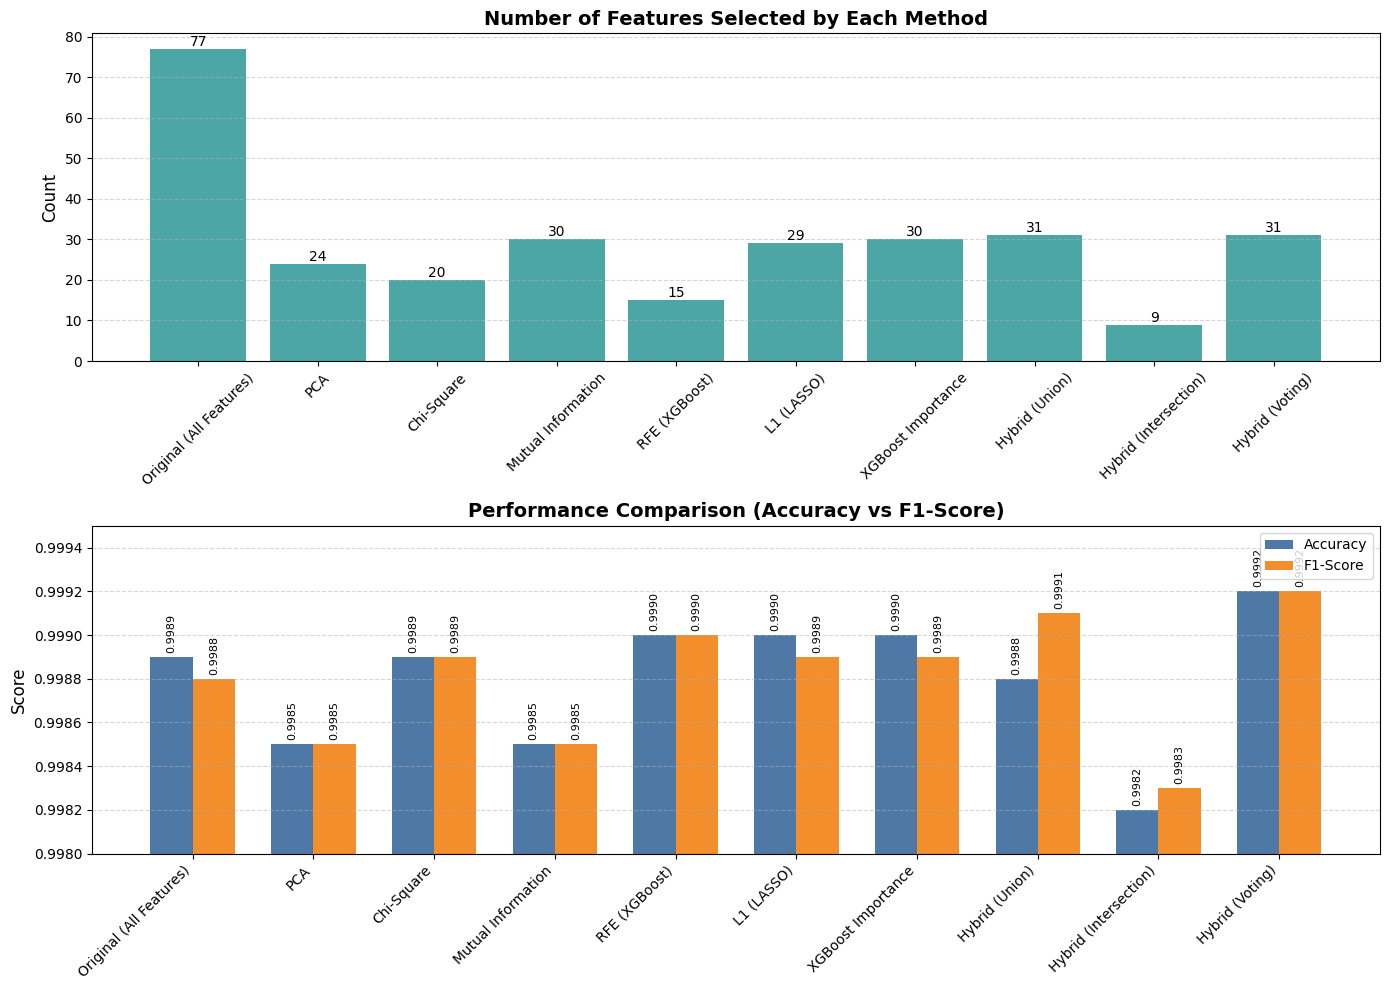

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data from the image
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    'No_of_Features': [77, 24, 20, 30, 15, 29, 30, 31, 9, 31],
    'Accuracy': [0.9989, 0.9985, 0.9989, 0.9985, 0.9990, 0.9990, 0.9990, 0.9988, 0.9982, 0.9992],
    'F1_Score': [0.9988, 0.9985, 0.9989, 0.9985, 0.9990, 0.9989, 0.9989, 0.9991, 0.9983, 0.9992]
}

# Create a DataFrame
df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4) # Add space between plots

# --- Subplot 1: Number of Features ---
colors_features = plt.cm.viridis(np.linspace(0, 0.8, len(df)))
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

ax1.set_title('Number of Features Selected by Each Method', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score (Grouped Bar Chart) ---
x = np.arange(len(df['Method']))
width = 0.35  # Width of the bars

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# IMPORTANT: Zoom into the y-axis to see the small differences
# The values are between 0.9982 and 0.9992
ax2.set_ylim(0.9980, 0.9995) 

# Add value labels for the performance chart (optional, can be crowded)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, rotation=90)

autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()

Graph successfully saved as 'cic_ddos_2019_performance.png'


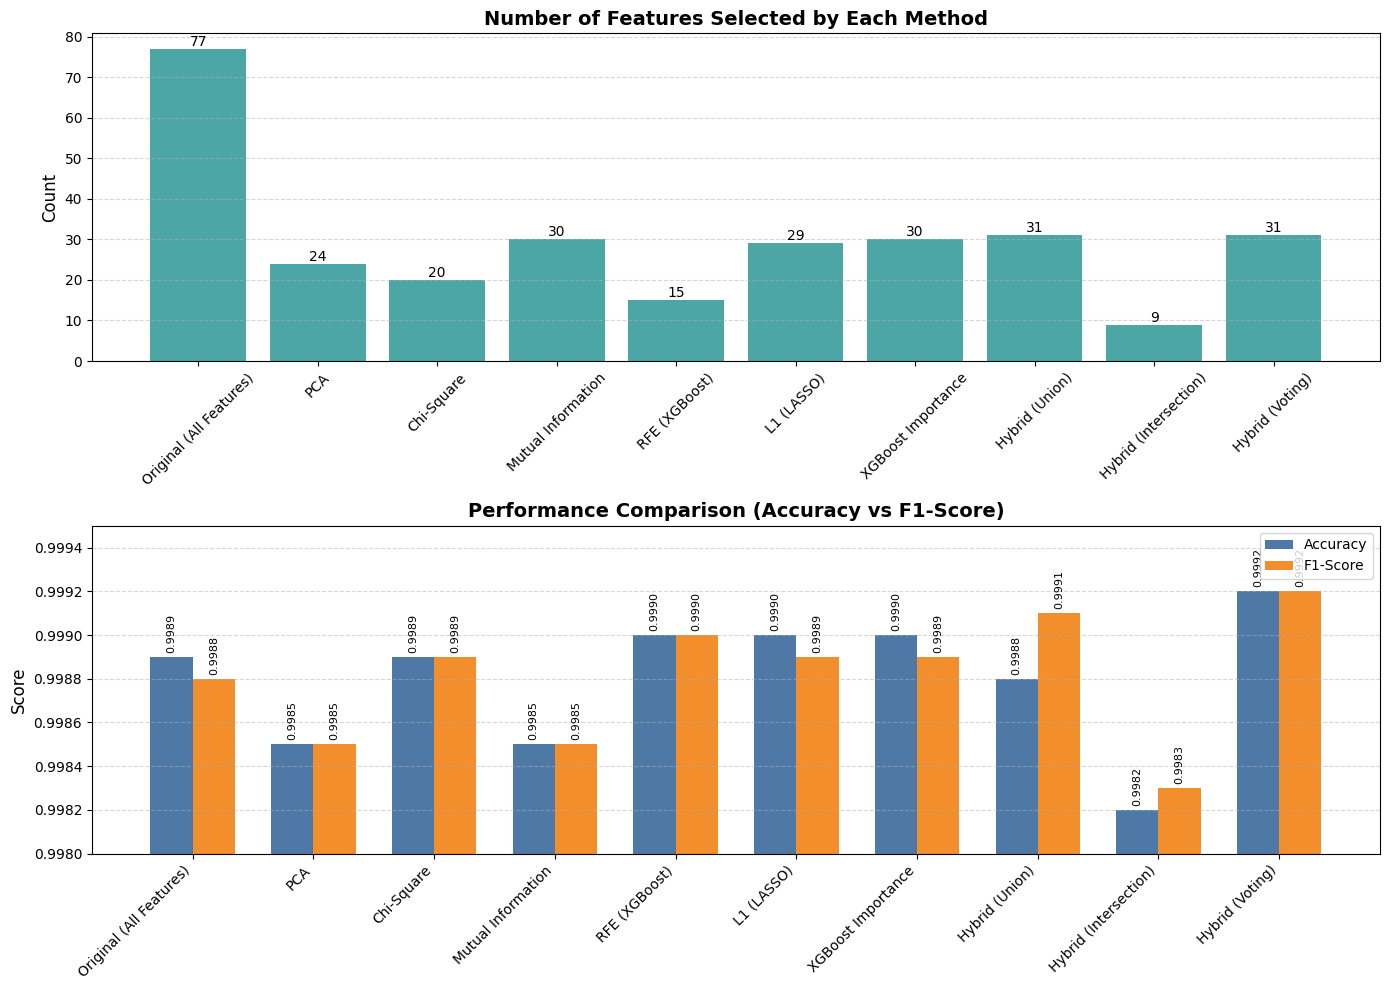

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    'No_of_Features': [77, 24, 20, 30, 15, 29, 30, 31, 9, 31],
    'Accuracy': [0.9989, 0.9985, 0.9989, 0.9985, 0.9990, 0.9990, 0.9990, 0.9988, 0.9982, 0.9992],
    'F1_Score': [0.9988, 0.9985, 0.9989, 0.9985, 0.9990, 0.9989, 0.9989, 0.9991, 0.9983, 0.9992]
}

# Create a DataFrame
df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4) # Add space between plots

# --- Subplot 1: Number of Features ---
colors_features = plt.cm.viridis(np.linspace(0, 0.8, len(df)))
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

ax1.set_title('Number of Features Selected by Each Method', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score (Grouped Bar Chart) ---
x = np.arange(len(df['Method']))
width = 0.35  # Width of the bars

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# IMPORTANT: Zoom into the y-axis to see the small differences
ax2.set_ylim(0.9980, 0.9995) 

# Add value labels for the performance chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# --- SAVE THE FIGURE ---
# This line saves the graph to your working directory
plt.savefig('cic_ddos_2019_performance.png', dpi=300, bbox_inches='tight')
print("Graph successfully saved as 'cic_ddos_2019_performance.png'")

# Show the plot
plt.show()

Plot successfully saved as 'cic_ddos_2019_comparison_plot.png'


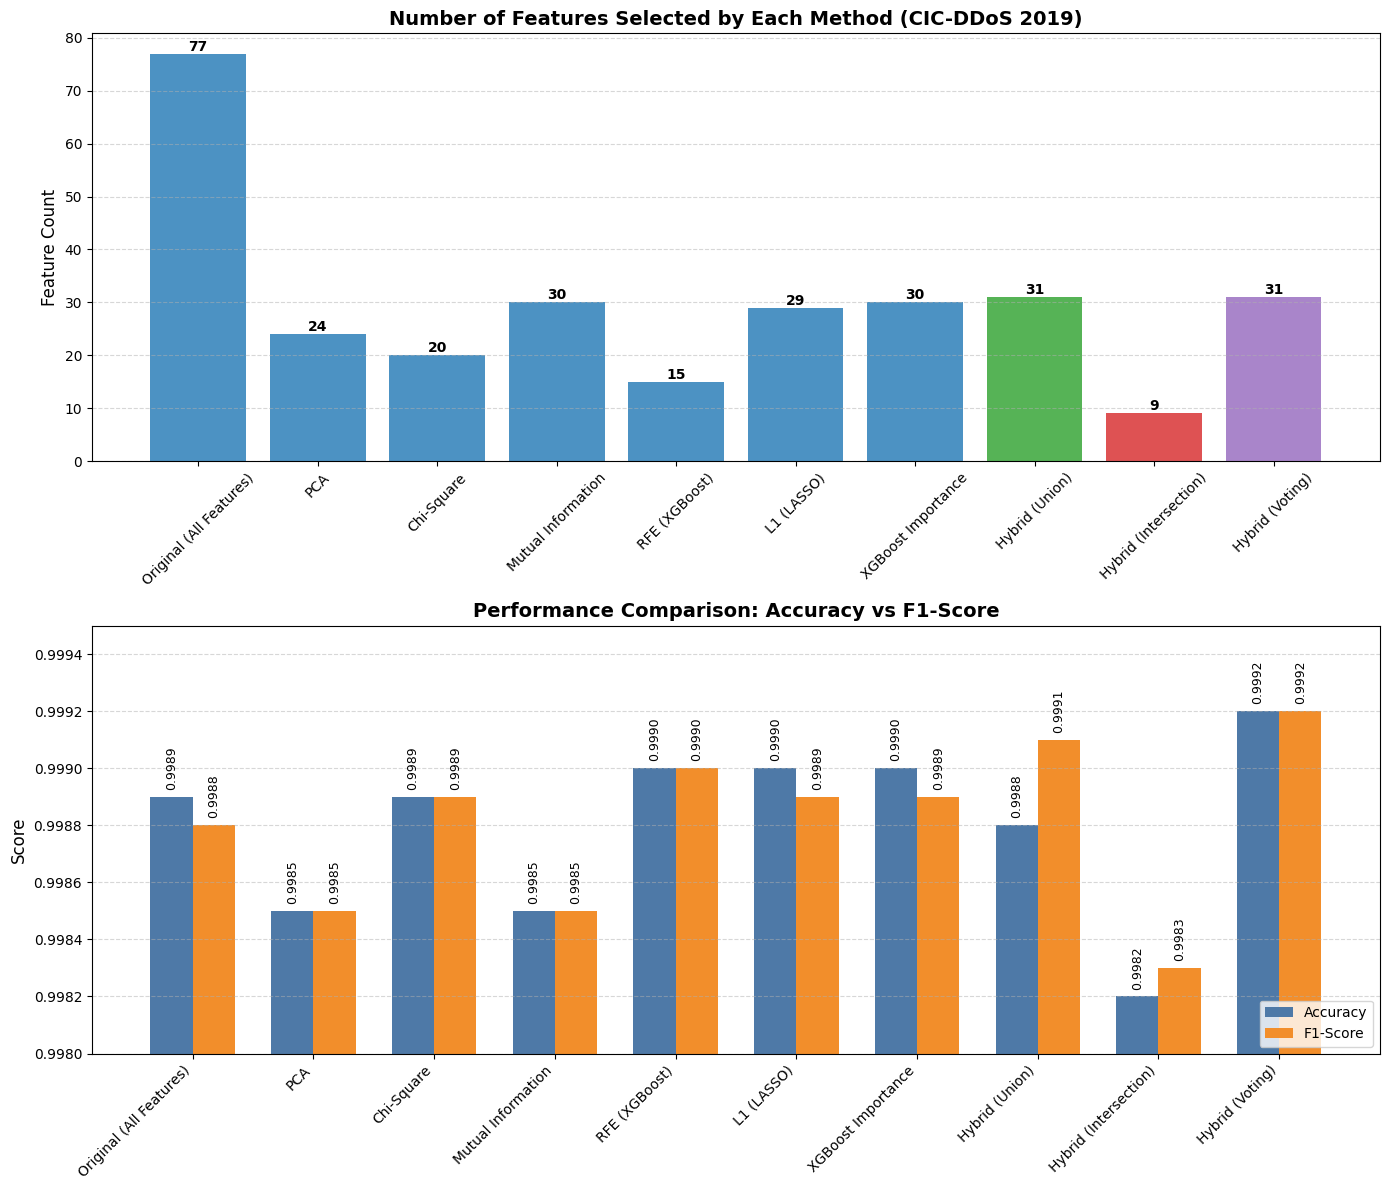

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data from Table 14 (CIC-DDoS 2019 Dataset)
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    'No_of_Features': [77, 24, 20, 30, 15, 29, 30, 31, 9, 31],
    'Accuracy': [0.9989, 0.9985, 0.9989, 0.9985, 0.9990, 0.9990, 0.9990, 0.9988, 0.9982, 0.9992],
    'F1_Score': [0.9988, 0.9985, 0.9989, 0.9985, 0.9990, 0.9989, 0.9989, 0.9991, 0.9983, 0.9992]
}

# Create a DataFrame
df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
plt.subplots_adjust(hspace=0.5) # Add space between plots

# --- Subplot 1: Number of Features ---
# Using a color map to distinguish the Hybrid methods
colors = ['#1f77b4'] * 7 + ['#2ca02c', '#d62728', '#9467bd'] # Default blue for baselines, distinctive for hybrids
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color=colors, alpha=0.8)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.set_title('Number of Features Selected by Each Method (CIC-DDoS 2019)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Feature Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score (Grouped Bar Chart) ---
x = np.arange(len(df['Method']))
width = 0.35  # Width of the bars

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison: Accuracy vs F1-Score', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# IMPORTANT: Zoom into the y-axis to see the small differences
# The lowest score is 0.9982 and highest is 0.9992
ax2.set_ylim(0.9980, 0.9995) 

# Add value labels for the performance chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, rotation=90)

autolabel(rects1)
autolabel(rects2)

# --- SAVE THE FIGURE ---
plt.tight_layout()
filename = 'cic_ddos_2019_comparison_plot.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Plot successfully saved as '{filename}'")

# Show the plot
plt.show()

Graph successfully saved as 'weather_dataset_performance.png'


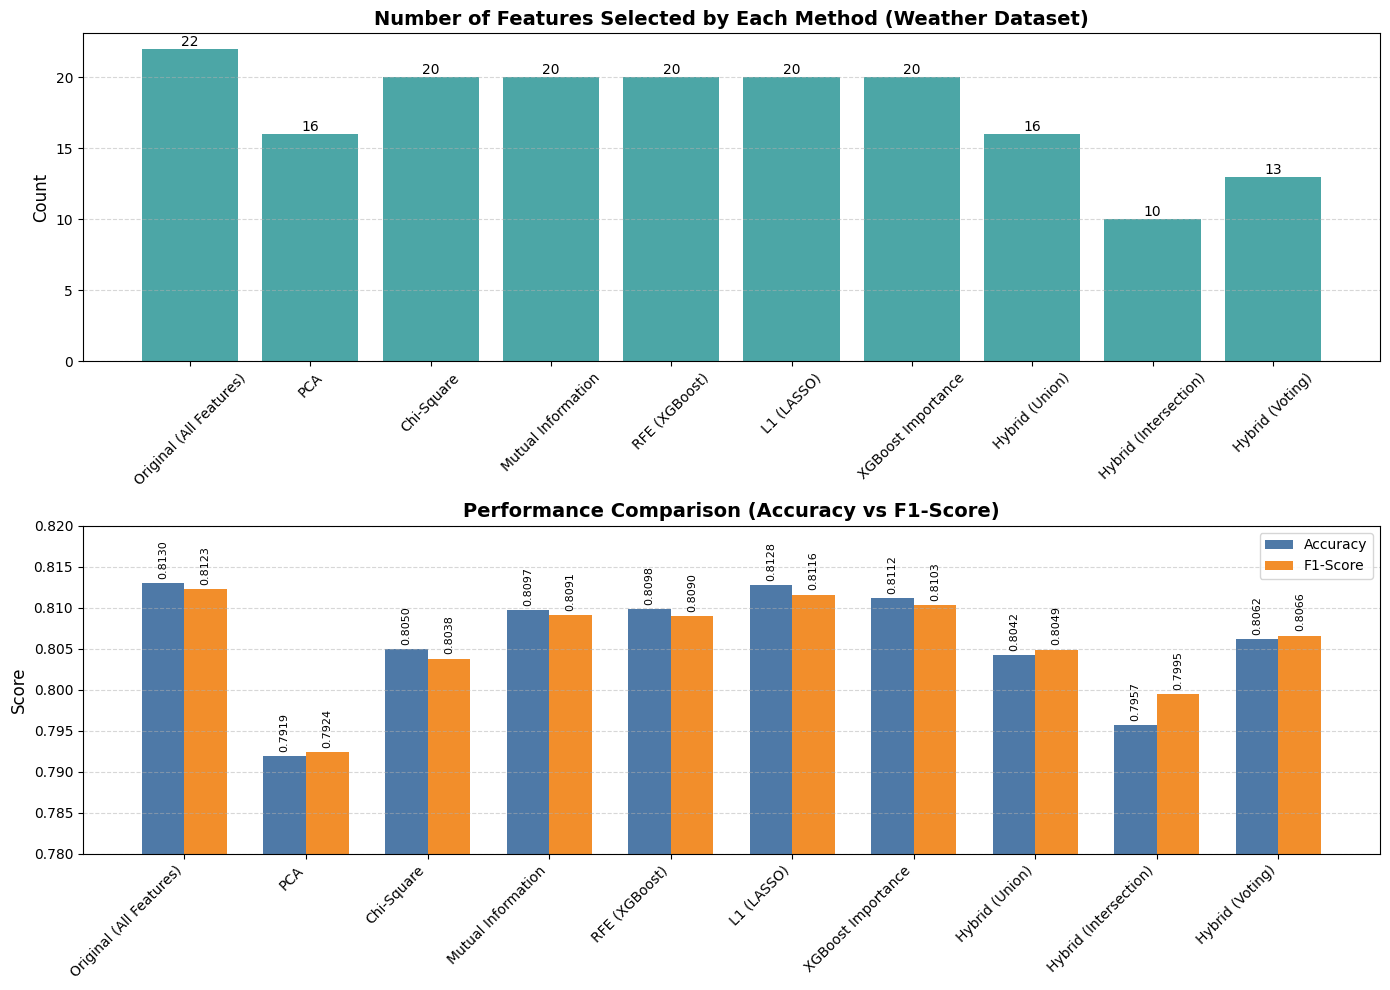

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data for Weather Dataset (Table 15)
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    # No. of Features column
    'No_of_Features': [22, 16, 20, 20, 20, 20, 20, 16, 10, 13], 
    # Accuracy column
    'Accuracy': [0.8130, 0.7919, 0.8050, 0.8097, 0.8098, 0.8128, 0.8112, 0.8042, 0.7957, 0.8062],
    # F1-Score column
    'F1_Score': [0.8123, 0.7924, 0.8038, 0.8091, 0.8090, 0.8116, 0.8103, 0.8049, 0.7995, 0.8066]
}

# Create a DataFrame
df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4) # Add space between plots

# --- Subplot 1: Number of Features ---
colors_features = plt.cm.viridis(np.linspace(0, 0.8, len(df)))
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

ax1.set_title('Number of Features Selected by Each Method (Weather Dataset)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score (Grouped Bar Chart) ---
x = np.arange(len(df['Method']))
width = 0.35  # Width of the bars

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# IMPORTANT: Adjust Zoom for Weather Data Range (approx 0.79 - 0.815)
ax2.set_ylim(0.7800, 0.8200) 

# Add value labels for the performance chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# --- SAVE THE FIGURE ---
# This line saves the graph to your working directory
plt.savefig('weather_dataset_performance.png', dpi=300, bbox_inches='tight')
print("Graph successfully saved as 'weather_dataset_performance.png'")

# Show the plot
plt.show()

Graph successfully saved as 'weather_dataset_performance.png'


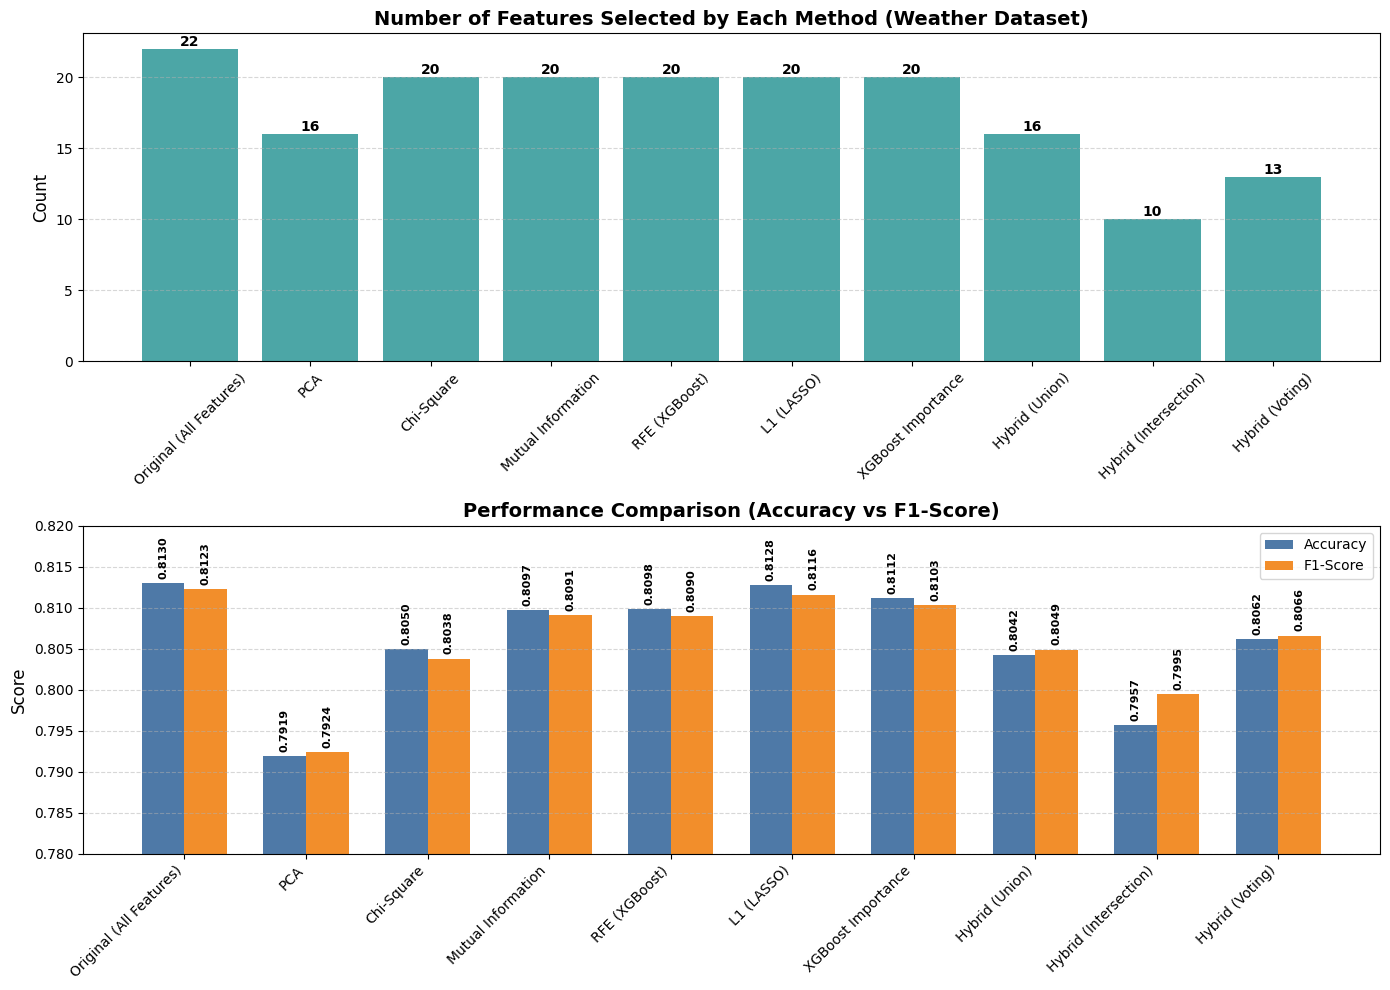

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data for Weather Dataset (Table 15)
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    # No. of Features column
    'No_of_Features': [22, 16, 20, 20, 20, 20, 20, 16, 10, 13], 
    # Accuracy column
    'Accuracy': [0.8130, 0.7919, 0.8050, 0.8097, 0.8098, 0.8128, 0.8112, 0.8042, 0.7957, 0.8062],
    # F1-Score column
    'F1_Score': [0.8123, 0.7924, 0.8038, 0.8091, 0.8090, 0.8116, 0.8103, 0.8049, 0.7995, 0.8066]
}

# Create a DataFrame
df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4) # Add space between plots

# --- Subplot 1: Number of Features ---
colors_features = plt.cm.viridis(np.linspace(0, 0.8, len(df)))
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom',fontweight='bold')

ax1.set_title('Number of Features Selected by Each Method (Weather Dataset)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score (Grouped Bar Chart) ---
x = np.arange(len(df['Method']))
width = 0.35  # Width of the bars

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# IMPORTANT: Adjust Zoom for Weather Data Range (approx 0.79 - 0.815)
ax2.set_ylim(0.7800, 0.8200) 

# Add value labels for the performance chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, rotation=90,fontweight='bold')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# --- SAVE THE FIGURE ---
# This line saves the graph to your working directory
plt.savefig('weather_dataset_performance.png', dpi=300, bbox_inches='tight')
print("Graph successfully saved as 'weather_dataset_performance.png'")

# Show the plot
plt.show()

Graph successfully saved as 'cic_ddos_2019_performance.png'


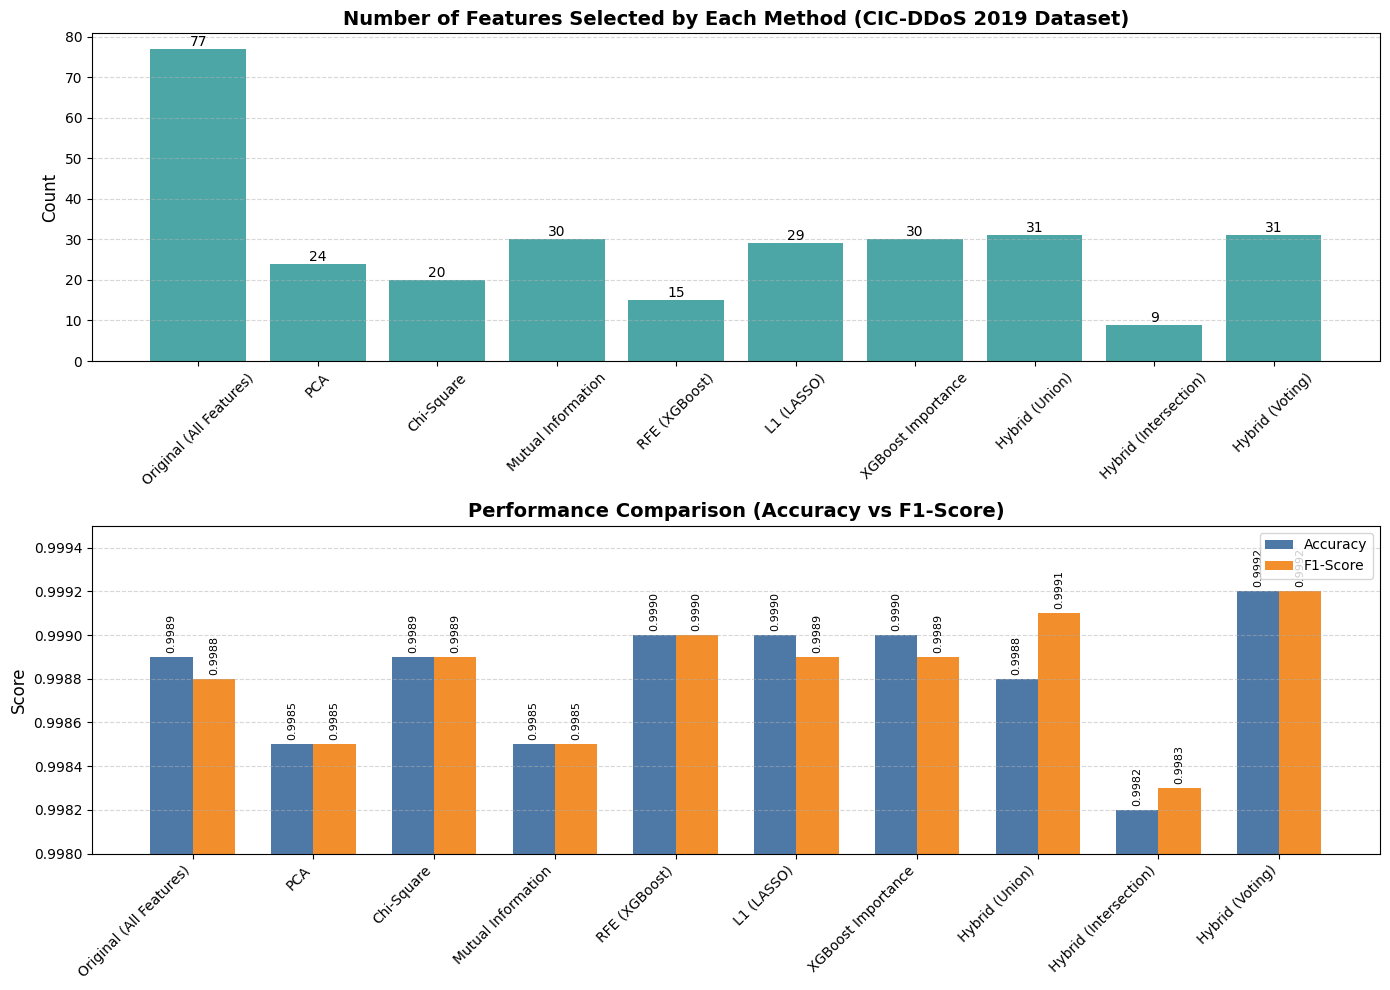

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data for CIC-DDoS 2019 Dataset (Table 14)
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    # No. of Features column
    'No_of_Features': [77, 24, 20, 30, 15, 29, 30, 31, 9, 31],
    # Accuracy column
    'Accuracy': [0.9989, 0.9985, 0.9989, 0.9985, 0.9990, 0.9990, 0.9990, 0.9988, 0.9982, 0.9992],
    # F1-Score column
    'F1_Score': [0.9988, 0.9985, 0.9989, 0.9985, 0.9990, 0.9989, 0.9989, 0.9991, 0.9983, 0.9992]
}

# Create a DataFrame
df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4) # Add space between plots

# --- Subplot 1: Number of Features ---
colors_features = plt.cm.viridis(np.linspace(0, 0.8, len(df)))
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

ax1.set_title('Number of Features Selected by Each Method (CIC-DDoS 2019 Dataset)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score (Grouped Bar Chart) ---
x = np.arange(len(df['Method']))
width = 0.35  # Width of the bars

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# IMPORTANT: Zoom into the y-axis to see the small differences
# The values are approx 0.998 - 0.999
ax2.set_ylim(0.9980, 0.9995) 


# Add value labels for the performance chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, rotation=90)

autolabel(rects1)
autolabel(rects2)


plt.tight_layout()

# --- SAVE THE FIGURE ---
plt.savefig('cic_ddos_2019_performance.png', dpi=300, bbox_inches='tight')
print("Graph successfully saved as 'cic_ddos_2019_performance.png'")

# Show the plot
plt.show()

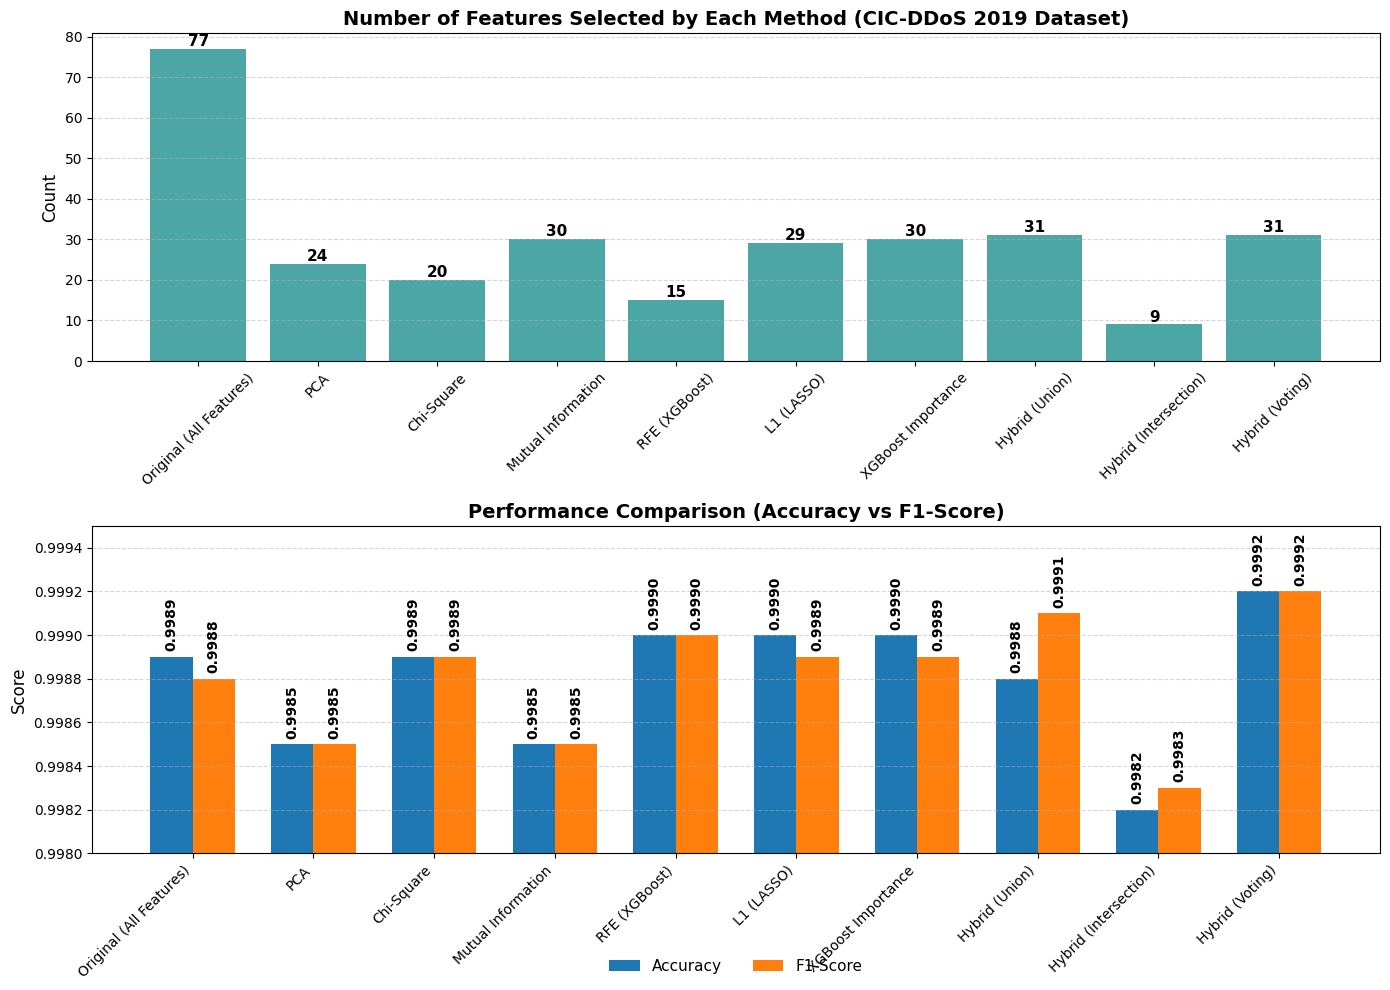

Graph successfully saved as 'cic_ddos_2019_performance.png'


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data for CIC-DDoS 2019 Dataset (Table 14)
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    'No_of_Features': [77, 24, 20, 30, 15, 29, 30, 31, 9, 31],
    'Accuracy': [0.9989, 0.9985, 0.9989, 0.9985, 0.9990, 0.9990, 0.9990, 0.9988, 0.9982, 0.9992],
    'F1_Score': [0.9988, 0.9985, 0.9989, 0.9985, 0.9990, 0.9989, 0.9989, 0.9991, 0.9983, 0.9992]
}

df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4)

# --- Subplot 1: Number of Features ---
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

ax1.set_title('Number of Features Selected by Each Method (CIC-DDoS 2019 Dataset)',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score ---
x = np.arange(len(df['Method']))
width = 0.35

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)',
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_ylim(0.9980, 0.9995)

# ---- LEGEND AT BOTTOM ----
ax2.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.28),
    ncol=2,
    frameon=False,
    fontsize=11
)

# ---- Dark & Bold value labels ----
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(
            f'{height:.4f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 4),
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold',
            color='black',
            rotation=90
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('cic_ddos_2019_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Graph successfully saved as 'cic_ddos_2019_performance.png'")


Graph successfully saved as 'heart_attack_performance.png'


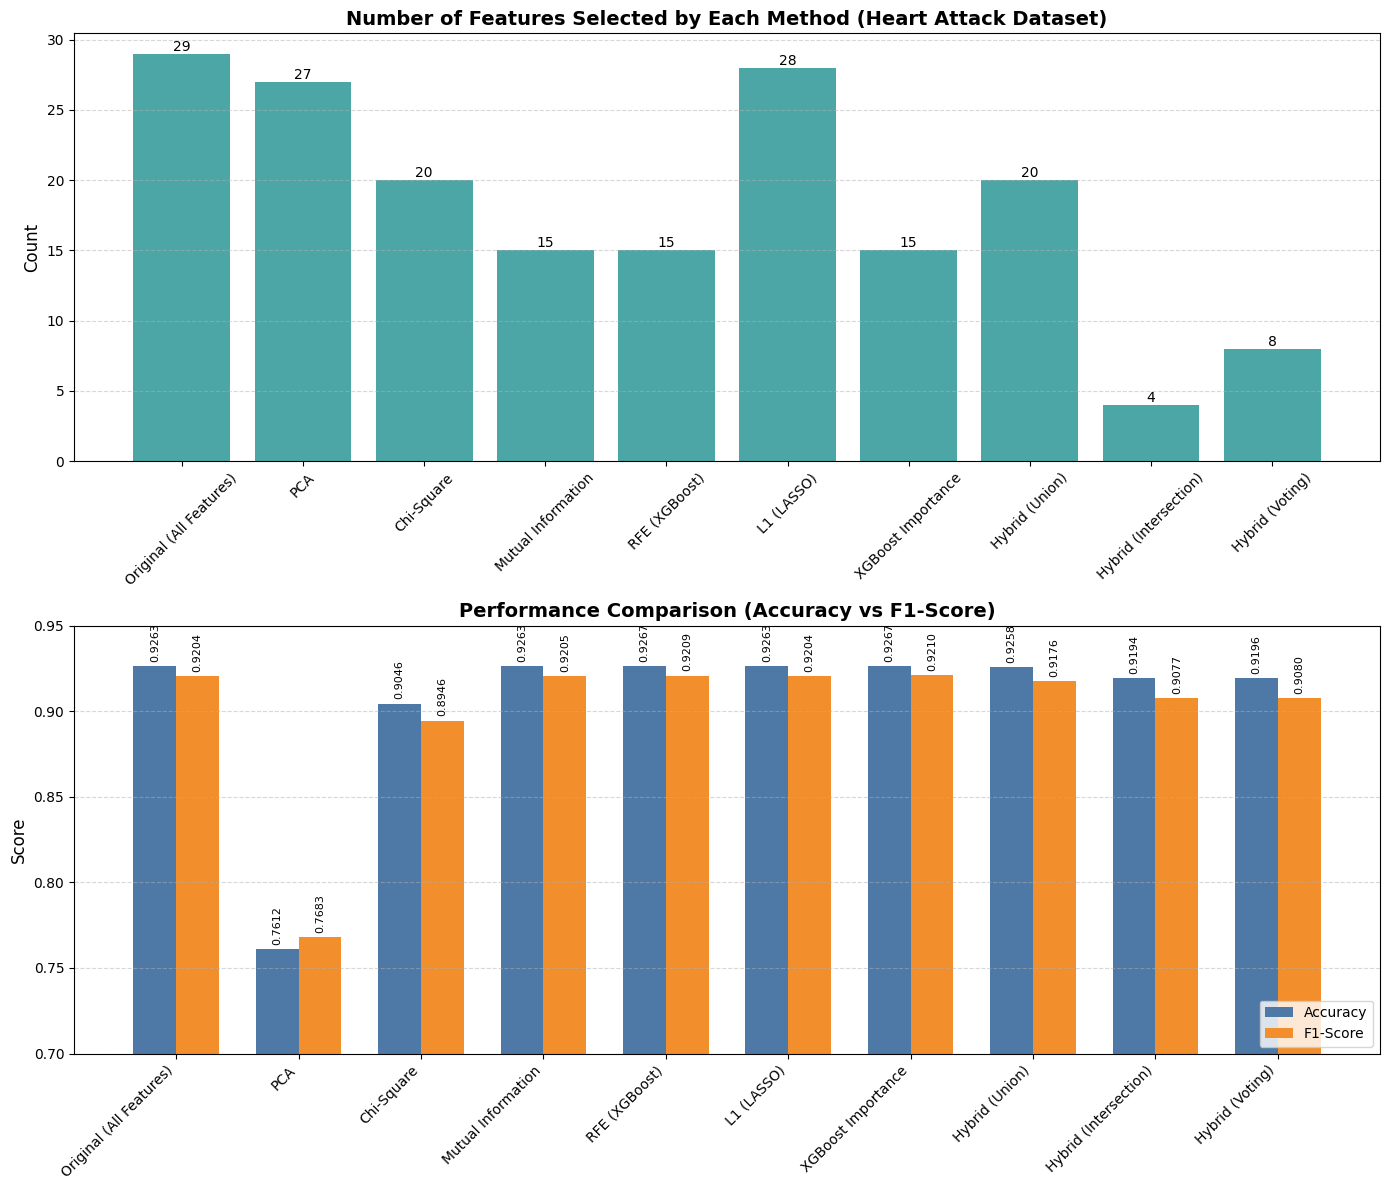

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data for Heart Attack Dataset (Table 16)
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    # No. of Features column
    'No_of_Features': [29, 27, 20, 15, 15, 28, 15, 20, 4, 8],
    # Accuracy column
    'Accuracy': [0.9263, 0.7612, 0.9046, 0.9263, 0.9267, 0.9263, 0.9267, 0.9258, 0.9194, 0.9196],
    # F1-Score column
    'F1_Score': [0.9204, 0.7683, 0.8946, 0.9205, 0.9209, 0.9204, 0.9210, 0.9176, 0.9077, 0.9080]
}

# Create a DataFrame
df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
plt.subplots_adjust(hspace=0.5) # Add space between plots

# --- Subplot 1: Number of Features ---
colors_features = plt.cm.viridis(np.linspace(0, 0.8, len(df)))
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

ax1.set_title('Number of Features Selected by Each Method (Heart Attack Dataset)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score (Grouped Bar Chart) ---
x = np.arange(len(df['Method']))
width = 0.35  # Width of the bars

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# IMPORTANT: Zoom into the y-axis to see the differences
# We set it to 0.70 to include PCA (0.76) while showing the top performers (0.92)
ax2.set_ylim(0.70, 0.95)

# Add value labels for the performance chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# --- SAVE THE FIGURE ---
# This line saves the graph to your working directory
plt.savefig('heart_attack_performance.png', dpi=300, bbox_inches='tight')
print("Graph successfully saved as 'heart_attack_performance.png'")

# Show the plot
plt.show()

Graph successfully saved as 'heart_attack_performance.png'


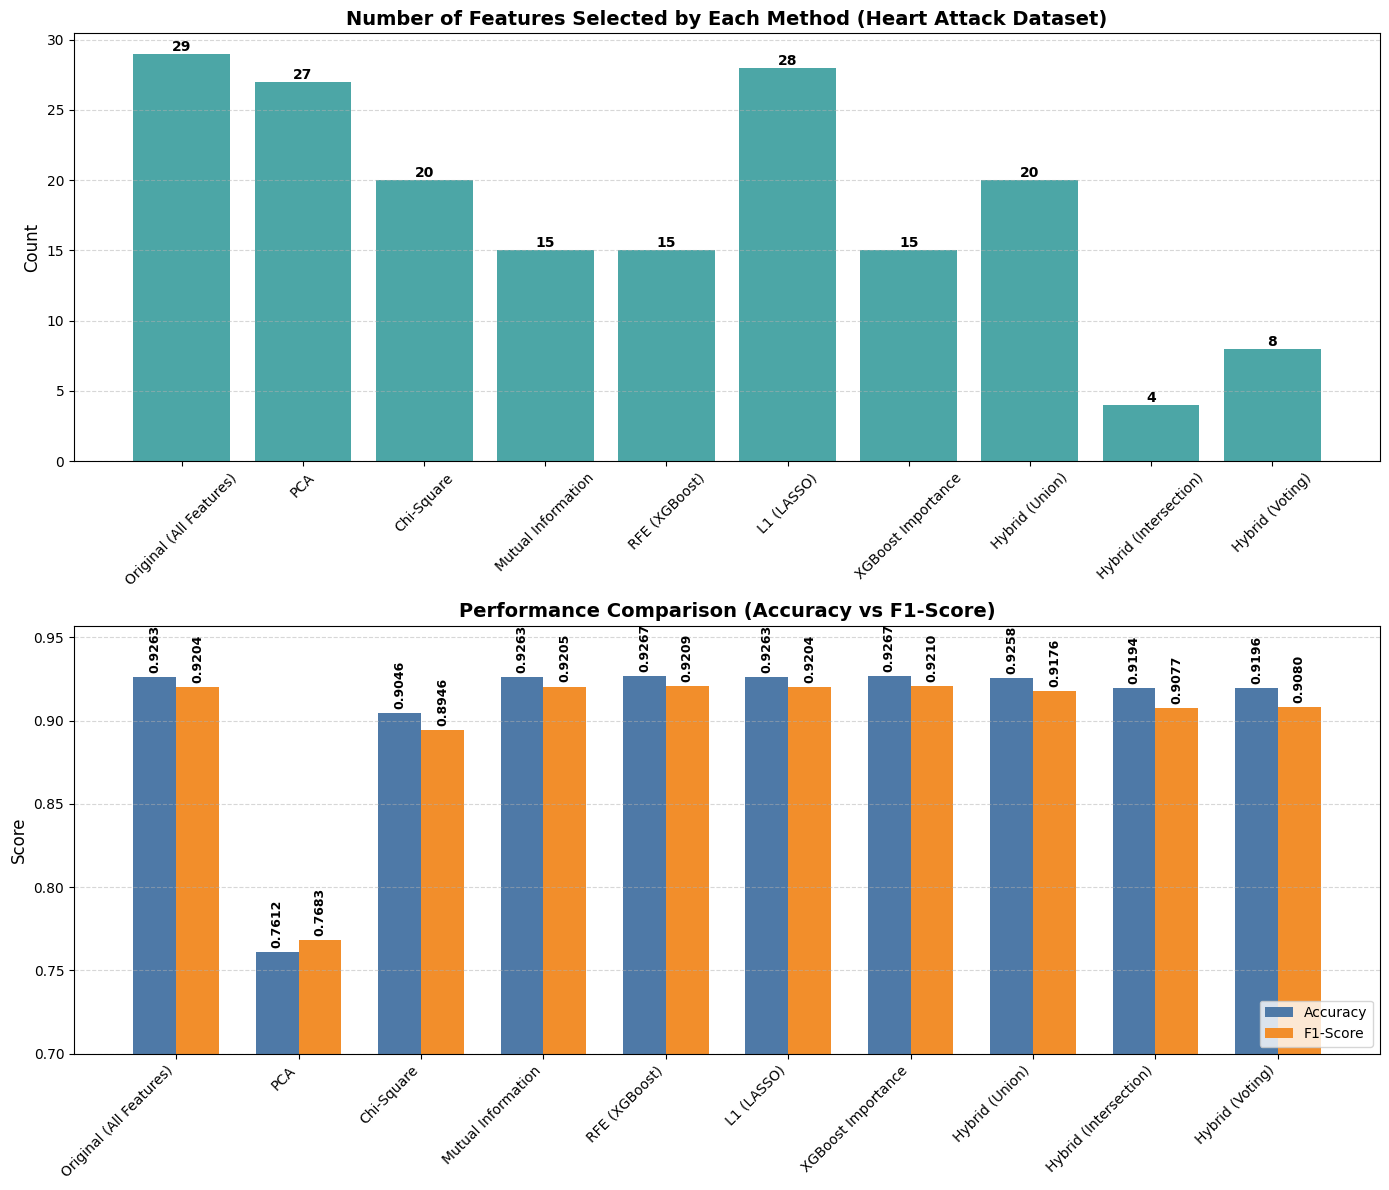

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data for Heart Attack Dataset (Table 16)
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    'No_of_Features': [29, 27, 20, 15, 15, 28, 15, 20, 4, 8],
    'Accuracy': [0.9263, 0.7612, 0.9046, 0.9263, 0.9267, 0.9263, 0.9267, 0.9258, 0.9194, 0.9196],
    'F1_Score': [0.9204, 0.7683, 0.8946, 0.9205, 0.9209, 0.9204, 0.9210, 0.9176, 0.9077, 0.9080]
}

df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
plt.subplots_adjust(hspace=0.5)

# --- Subplot 1: Number of Features ---
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'   # ✅ MADE BOLD
    )

ax1.set_title('Number of Features Selected by Each Method (Heart Attack Dataset)',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score ---
x = np.arange(len(df['Method']))
width = 0.35

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)',
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

ax2.set_ylim(0.70, 0.957)

# ---- Bold value labels ----
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(
            f'{height:.4f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold',   # ✅ MADE BOLD
            rotation=90
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# --- SAVE THE FIGURE ---
plt.savefig('heart_attack_performance.png', dpi=300, bbox_inches='tight')
print("Graph successfully saved as 'heart_attack_performance.png'")

plt.show()


Graph successfully saved as 'loan_approval_performance.png'


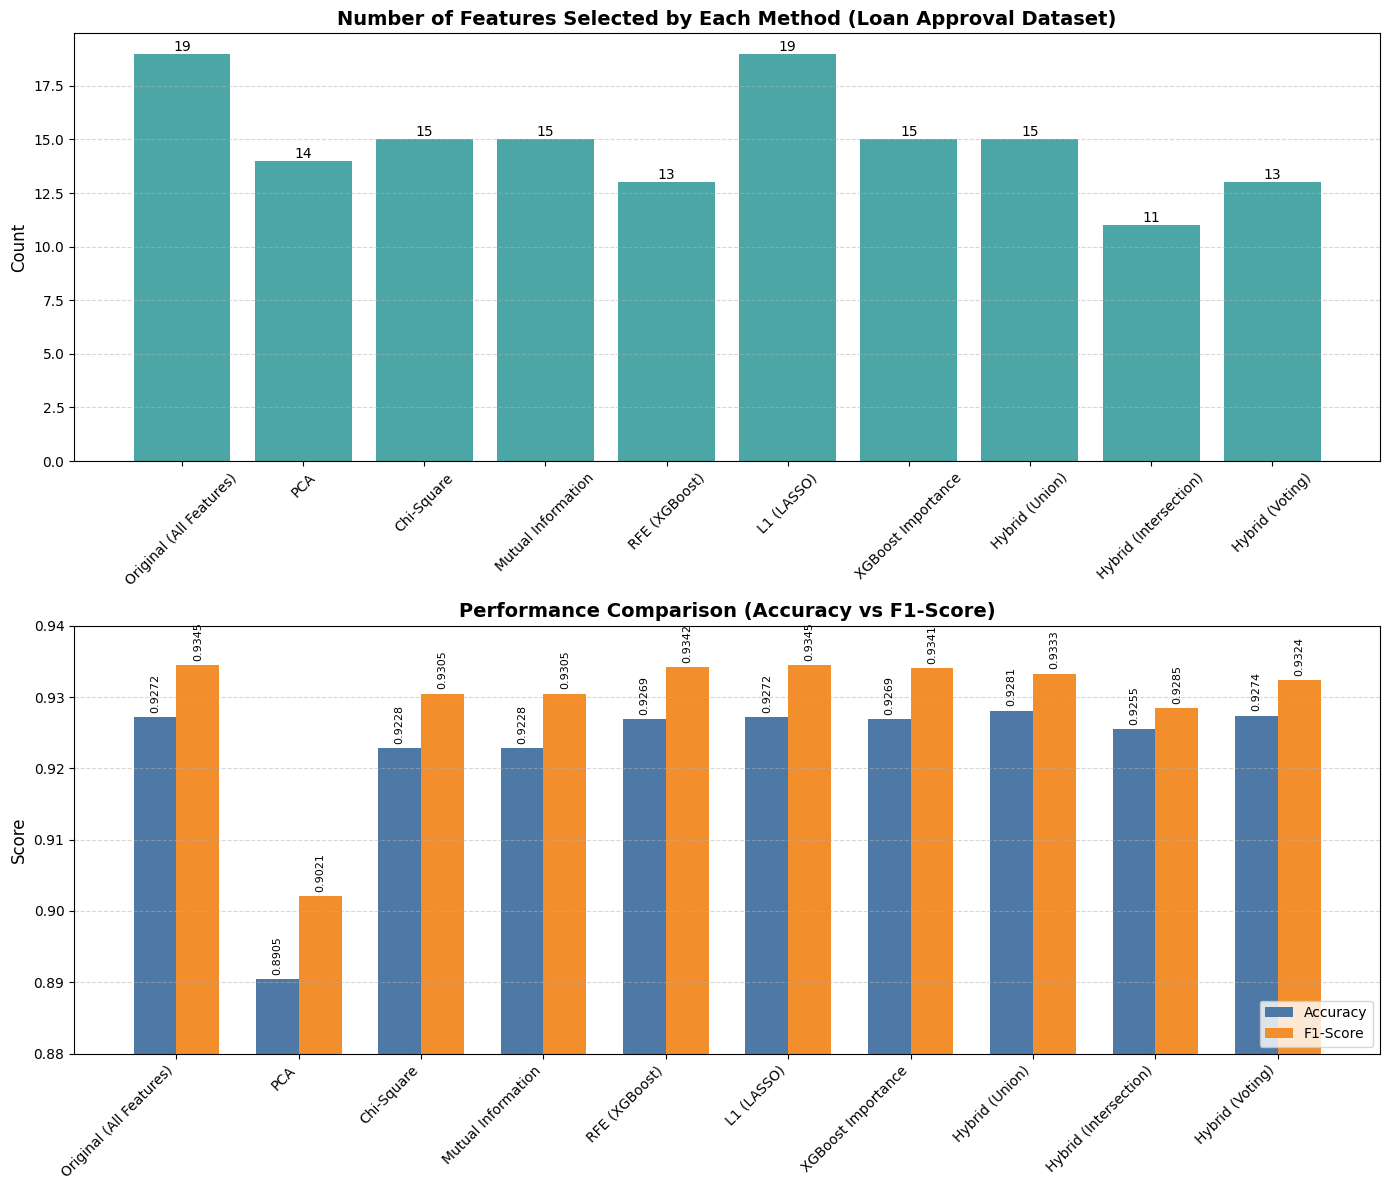

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data for Loan Approval Dataset (Table 17)
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    # No. of Features column
    'No_of_Features': [19, 14, 15, 15, 13, 19, 15, 15, 11, 13],
    # Accuracy column
    'Accuracy': [0.9272, 0.8905, 0.9228, 0.9228, 0.9269, 0.9272, 0.9269, 0.9281, 0.9255, 0.9274],
    # F1-Score column
    'F1_Score': [0.9345, 0.9021, 0.9305, 0.9305, 0.9342, 0.9345, 0.9341, 0.9333, 0.9285, 0.9324]
}

# Create a DataFrame
df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
plt.subplots_adjust(hspace=0.5) # Add space between plots

# --- Subplot 1: Number of Features ---
colors_features = plt.cm.viridis(np.linspace(0, 0.8, len(df)))
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

ax1.set_title('Number of Features Selected by Each Method (Loan Approval Dataset)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score (Grouped Bar Chart) ---
x = np.arange(len(df['Method']))
width = 0.35  # Width of the bars

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# IMPORTANT: Zoom into the y-axis to see the differences
# Range set to include PCA (0.89/0.90) and top performers (~0.93)
ax2.set_ylim(0.88, 0.94)

# Add value labels for the performance chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# --- SAVE THE FIGURE ---
# This line saves the graph to your working directory
plt.savefig('loan_approval_performance.png', dpi=300, bbox_inches='tight')
print("Graph successfully saved as 'loan_approval_performance.png'")

# Show the plot
plt.show()

Graph successfully saved as 'loan_approval_performance.png'


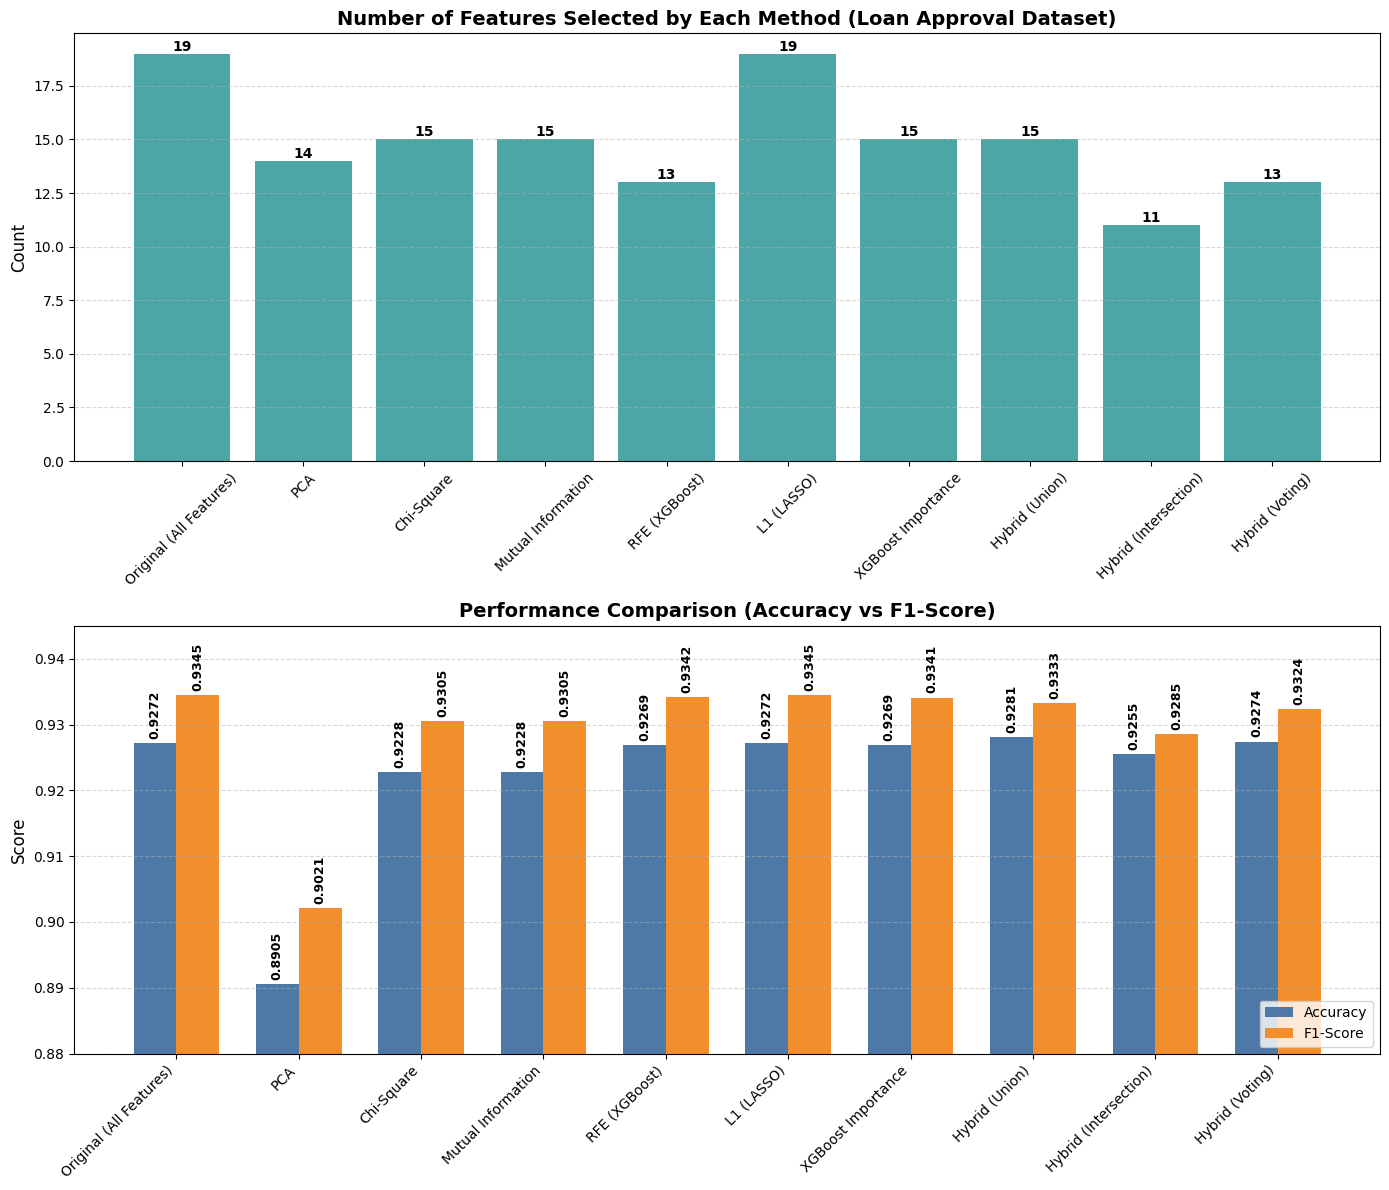

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Define the data for Loan Approval Dataset (Table 17)
data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square', 'Mutual Information',
        'RFE (XGBoost)', 'L1 (LASSO)', 'XGBoost Importance',
        'Hybrid (Union)', 'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],
    'No_of_Features': [19, 14, 15, 15, 13, 19, 15, 15, 11, 13],
    'Accuracy': [0.9272, 0.8905, 0.9228, 0.9228, 0.9269, 0.9272, 0.9269, 0.9281, 0.9255, 0.9274],
    'F1_Score': [0.9345, 0.9021, 0.9305, 0.9305, 0.9342, 0.9345, 0.9341, 0.9333, 0.9285, 0.9324]
}

df = pd.DataFrame(data)

# 2. Setup the plot configuration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
plt.subplots_adjust(hspace=0.5)

# --- Subplot 1: Number of Features ---
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.7)

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'   # ✅ MADE BOLD
    )

ax1.set_title('Number of Features Selected by Each Method (Loan Approval Dataset)',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Subplot 2: Accuracy and F1-Score ---
x = np.arange(len(df['Method']))
width = 0.35

rects1 = ax2.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width, label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison (Accuracy vs F1-Score)',
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

ax2.set_ylim(0.88, 0.945)

# ---- Bold value labels ----
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(
            f'{height:.4f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold',   # ✅ MADE BOLD
            rotation=90,
            clip_on=False
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# --- SAVE THE FIGURE ---
plt.savefig('loan_approval_performance.png', dpi=300, bbox_inches='tight')
print("Graph successfully saved as 'loan_approval_performance.png'")

plt.show()


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/2018ids/ids2018_cleaned_combined_1.csv")

Graph saved as ids2018_feature_selection_comparison.png


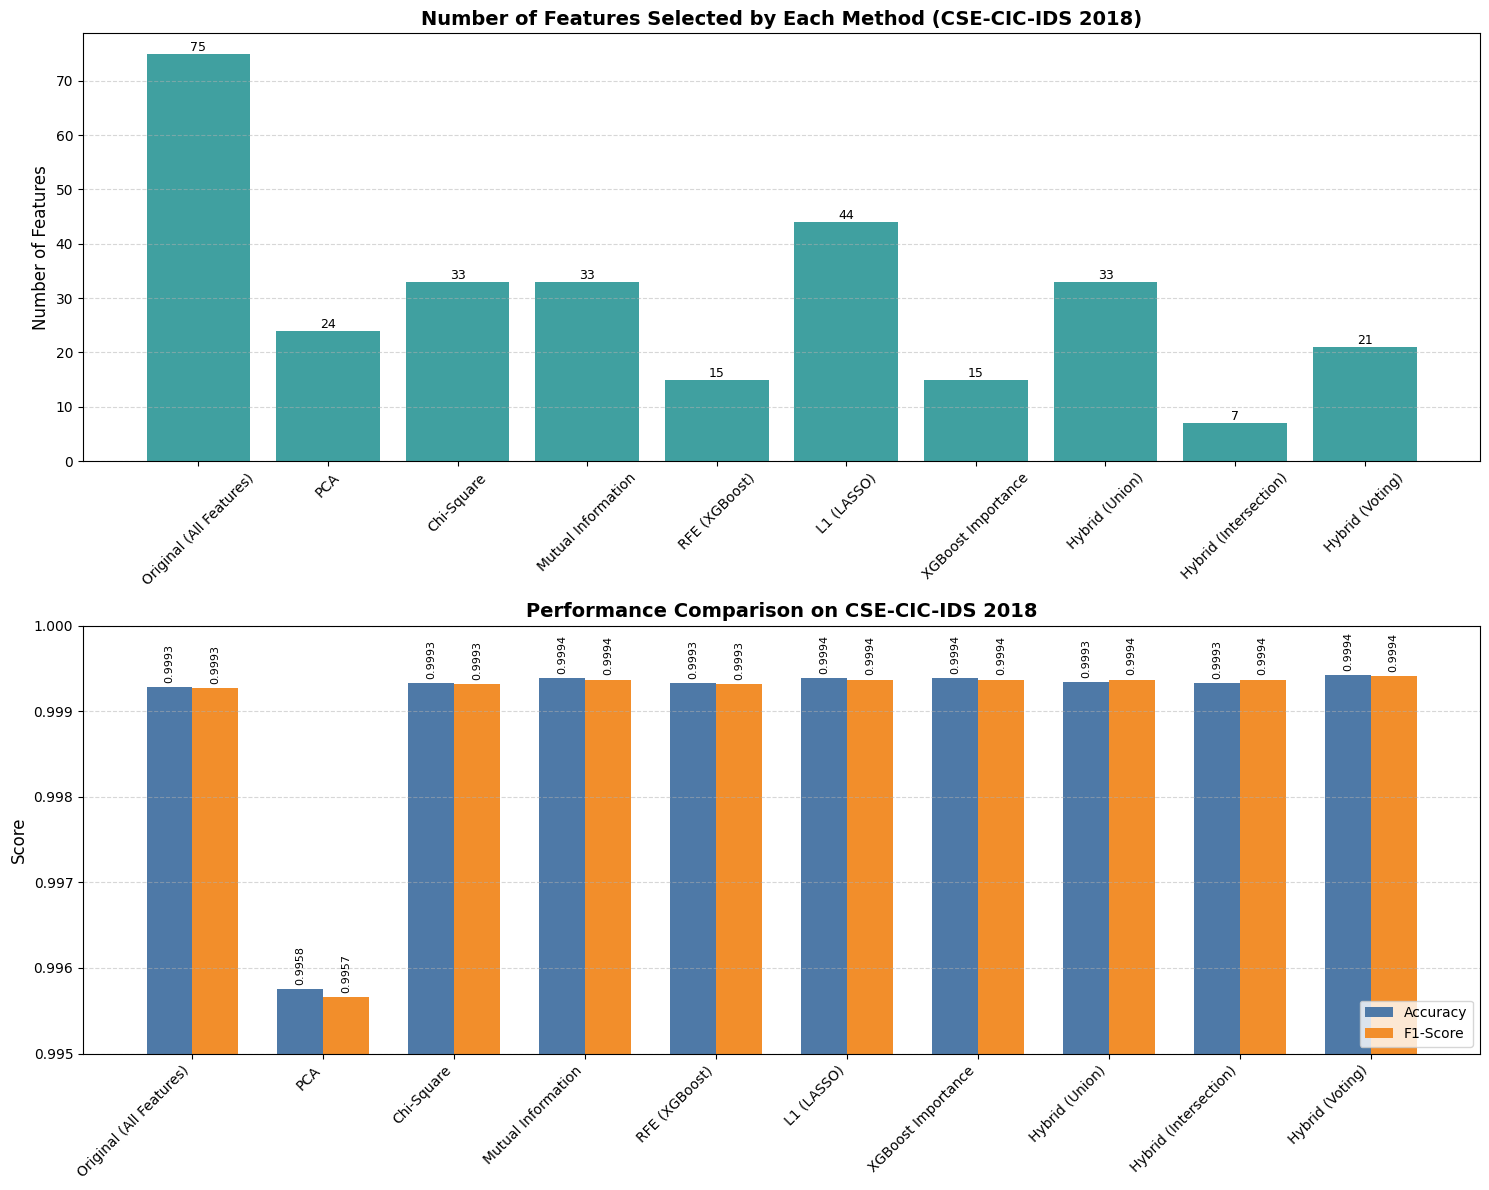

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ============================================================
# IDS 2018 RESULTS (Extracted from your logs)
# ============================================================

data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square',
        'Mutual Information', 'RFE (XGBoost)', 'L1 (LASSO)',
        'XGBoost Importance', 'Hybrid (Union)',
        'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],

    'No_of_Features': [
        75,   # Original
        24,   # PCA
        33,   # Chi-Square (best)
        33,   # Mutual Information (best)
        15,   # RFE
        44,   # LASSO
        15,   # XGBoost Importance
        33,   # Hybrid Union
        7,    # Hybrid Intersection
        21    # Hybrid Voting
    ],

    'Accuracy': [
        0.999284,  # Original
        0.995757,  # PCA
        0.999335,  # Chi-Square
        0.999387,  # Mutual Information
        0.999335,  # RFE
        0.999387,  # LASSO
        0.999387,  # XGBoost Importance
        0.999346,  # Hybrid Union
        0.999335,  # Hybrid Intersection
        0.999427   # Hybrid Voting
    ],

    'F1_Score': [
        0.999268,  # Original
        0.995656,  # PCA
        0.999320,  # Chi-Square
        0.999372,  # Mutual Information
        0.999320,  # RFE
        0.999372,  # LASSO
        0.999372,  # XGBoost Importance
        0.999372,  # Hybrid Union
        0.999372,  # Hybrid Intersection
        0.999414   # Hybrid Voting
    ]
}

df = pd.DataFrame(data)

# ============================================================
# Plot configuration
# ============================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# ------------------ Subplot 1: Feature Count ------------------
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.75)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

ax1.set_title('Number of Features Selected by Each Method (CSE-CIC-IDS 2018)',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Features', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# ------------------ Subplot 2: Accuracy vs F1 ------------------
x = np.arange(len(df['Method']))
width = 0.35

rects1 = ax2.bar(x - width/2, df['Accuracy'], width,
                 label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width,
                 label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison on CSE-CIC-IDS 2018',
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Zoom Y-axis (important for IDS)
ax2.set_ylim(0.995, 1.000)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.4f}',
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=8, rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# ------------------ Save ------------------
plt.savefig('ids2018_feature_selection_comparison.png',
            dpi=300, bbox_inches='tight')

print("Graph saved as ids2018_feature_selection_comparison.png")

plt.show()


Graph saved as ids2018_feature_selection_comparison.png


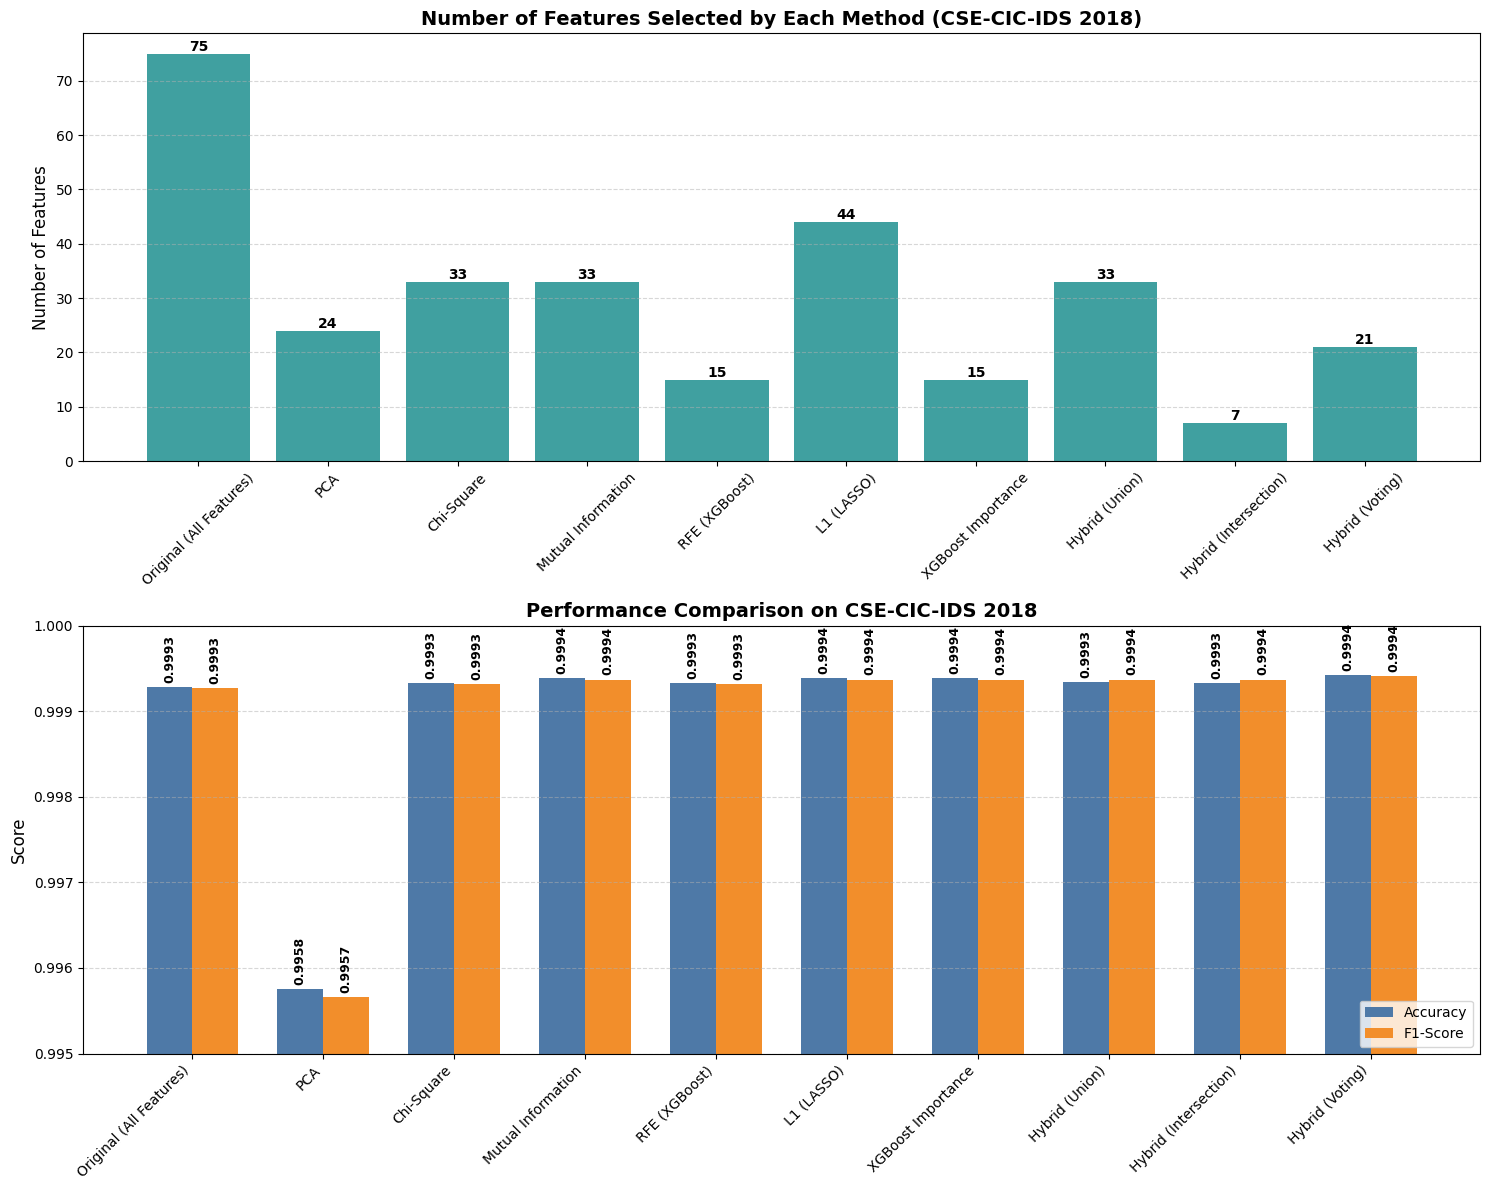

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ============================================================
# IDS 2018 RESULTS (Extracted from your logs)
# ============================================================

data = {
    'Method': [
        'Original (All Features)', 'PCA', 'Chi-Square',
        'Mutual Information', 'RFE (XGBoost)', 'L1 (LASSO)',
        'XGBoost Importance', 'Hybrid (Union)',
        'Hybrid (Intersection)', 'Hybrid (Voting)'
    ],

    'No_of_Features': [
        75, 24, 33, 33, 15, 44, 15, 33, 7, 21
    ],

    'Accuracy': [
        0.999284, 0.995757, 0.999335, 0.999387, 0.999335,
        0.999387, 0.999387, 0.999346, 0.999335, 0.999427
    ],

    'F1_Score': [
        0.999268, 0.995656, 0.999320, 0.999372, 0.999320,
        0.999372, 0.999372, 0.999372, 0.999372, 0.999414
    ]
}

df = pd.DataFrame(data)

# ============================================================
# Plot configuration
# ============================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# ------------------ Subplot 1: Feature Count ------------------
bars1 = ax1.bar(df['Method'], df['No_of_Features'], color='teal', alpha=0.75)

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'   # ✅ MADE BOLD
    )

ax1.set_title('Number of Features Selected by Each Method (CSE-CIC-IDS 2018)',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Features', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# ------------------ Subplot 2: Accuracy vs F1 ------------------
x = np.arange(len(df['Method']))
width = 0.35

rects1 = ax2.bar(x - width/2, df['Accuracy'], width,
                 label='Accuracy', color='#4e79a7')
rects2 = ax2.bar(x + width/2, df['F1_Score'], width,
                 label='F1-Score', color='#f28e2b')

ax2.set_title('Performance Comparison on CSE-CIC-IDS 2018',
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(df['Method'], rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

ax2.set_ylim(0.995, 1.000)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(
            f'{height:.4f}',
            xy=(rect.get_x() + rect.get_width()/2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold',   # ✅ MADE BOLD
            rotation=90
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# ------------------ Save ------------------
plt.savefig('ids2018_feature_selection_comparison.png',
            dpi=300, bbox_inches='tight')

print("Graph saved as ids2018_feature_selection_comparison.png")

plt.show()


In [11]:
import pickle

model_path = "/kaggle/input/intersection-model/other/default/1/hybrid_hlo_models_intersection_model (2).pkl"

with open(model_path, "rb") as f:
    xgb_model = pickle.load(f)


In [6]:
# Method 1 (recommended)
if hasattr(xgb_model, "feature_names_in_"):
    feature_names = list(xgb_model.feature_names_in_)
    print("Features used by the model:")
    for i, f in enumerate(feature_names, 1):
        print(f"{i}. {f}")
else:
    print("feature_names_in_ not found")


Features used by the model:
1. Dst Port
2. Timestamp
3. Fwd IAT Tot
4. RST Flag Cnt
5. Subflow Fwd Byts
6. Fwd Seg Size Min
7. Dst IP


In [7]:
import pandas as pd

# Get booster from trained model
booster = xgb_model.get_booster()

# Get importance scores (GAIN)
importance_dict = booster.get_score(importance_type="gain")

# Convert to DataFrame
importance_df = pd.DataFrame({
    "Feature": importance_dict.keys(),
    "Gain": importance_dict.values()
}).sort_values(by="Gain", ascending=True)

print(importance_df)


            Feature        Gain
4  Subflow Fwd Byts    0.457208
2       Fwd IAT Tot    1.817574
5  Fwd Seg Size Min    4.354860
3      RST Flag Cnt    7.494692
0          Dst Port  154.707794
1         Timestamp  754.398560


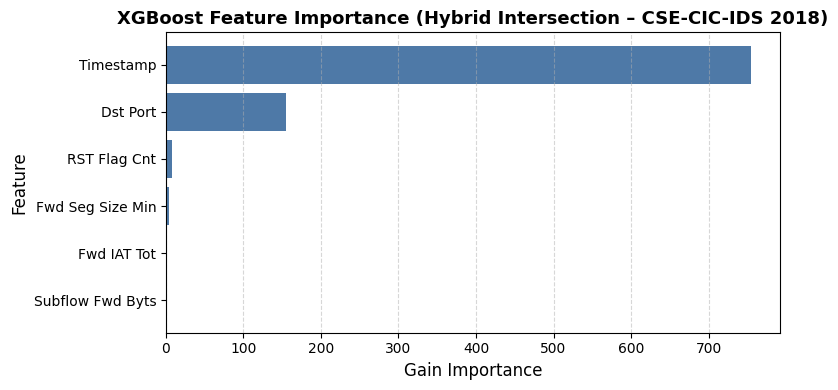

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.barh(
    importance_df["Feature"],
    importance_df["Gain"],
    color="#4e79a7"
)

plt.xlabel("Gain Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title(
    "XGBoost Feature Importance (Hybrid Intersection – CSE-CIC-IDS 2018)",
    fontsize=13,
    fontweight="bold"
)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

# Save as high-quality figure
plt.savefig(
    "ids2018_hybrid_intersection_feature_importance.pdf",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


            Feature        Gain
6            Dst IP    0.000000
4  Subflow Fwd Byts    0.457208
2       Fwd IAT Tot    1.817574
5  Fwd Seg Size Min    4.354860
3      RST Flag Cnt    7.494692
0          Dst Port  154.707794
1         Timestamp  754.398560


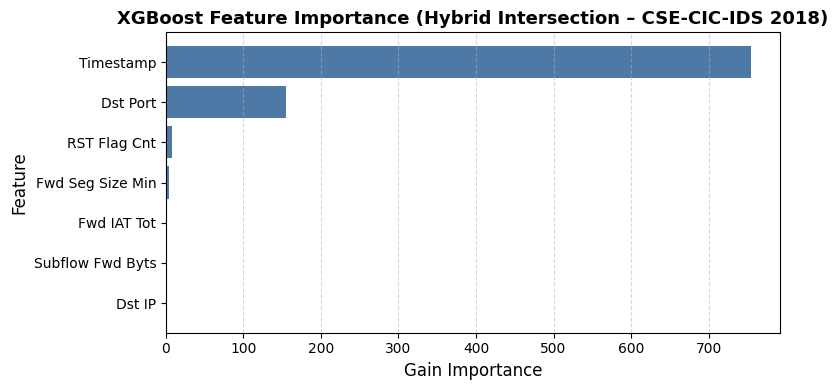

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# All trained features
all_features = list(xgb_model.feature_names_in_)

# Importance dictionary from booster
importance_dict = booster.get_score(importance_type="gain")

# Create full dataframe (missing features get gain = 0)
importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
}).sort_values(by="Gain", ascending=True)

print(importance_df)

# Plot
plt.figure(figsize=(8, 4))
plt.barh(importance_df["Feature"], importance_df["Gain"], color="#4e79a7")

plt.xlabel("Gain Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title(
    "XGBoost Feature Importance (Hybrid Intersection – CSE-CIC-IDS 2018)",
    fontsize=13,
    fontweight="bold"
)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig(
    "ids2018_hybrid_intersection_feature_importance_all7.pdf",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


union

In [2]:
import pickle

model_path = "/kaggle/input/union-model-ids/other/default/1/hybrid_hlo_models_union_model (2).pkl"
with open(model_path, "rb") as f:
    xgb_union_model = pickle.load(f)


In [4]:
# Method 1 (recommended)
if hasattr(xgb_union_model, "feature_names_in_"):
    feature_names = list(xgb_union_model.feature_names_in_)
    print("Features used by the model:")
    for i, f in enumerate(feature_names, 1):
        print(f"{i}. {f}")
else:
    print("feature_names_in_ not found")


Features used by the model:
1. Dst Port
2. Timestamp
3. Tot Fwd Pkts
4. Tot Bwd Pkts
5. Fwd Pkt Len Mean
6. Fwd Pkt Len Std
7. Bwd Pkt Len Max
8. Flow Pkts/s
9. Flow IAT Mean
10. Flow IAT Min
11. Fwd IAT Tot
12. Fwd IAT Mean
13. Fwd IAT Std
14. Bwd IAT Tot
15. Bwd IAT Mean
16. Bwd IAT Std
17. Bwd IAT Max
18. Fwd Header Len
19. Bwd Header Len
20. Bwd Pkts/s
21. Pkt Len Mean
22. Pkt Len Var
23. ACK Flag Cnt
24. URG Flag Cnt
25. ECE Flag Cnt
26. Fwd Seg Size Avg
27. Subflow Fwd Byts
28. Subflow Bwd Pkts
29. Init Fwd Win Byts
30. Active Mean
31. Active Max
32. Idle Min
33. Src Port


              Feature        Gain
32           Src Port    0.000000
30         Active Max    0.000000
27   Subflow Bwd Pkts    0.000000
25   Fwd Seg Size Avg    0.000000
23       URG Flag Cnt    0.000000
14       Bwd IAT Mean    0.333224
13        Bwd IAT Tot    0.356239
26   Subflow Fwd Byts    0.400535
4    Fwd Pkt Len Mean    0.456217
6     Bwd Pkt Len Max    0.485326
28  Init Fwd Win Byts    0.557591
20       Pkt Len Mean    0.638782
16        Bwd IAT Max    0.720551
22       ACK Flag Cnt    0.781871
8       Flow IAT Mean    0.830127
12        Fwd IAT Std    0.858028
9        Flow IAT Min    0.879184
18     Bwd Header Len    0.897367
5     Fwd Pkt Len Std    1.058679
21        Pkt Len Var    1.135685
17     Fwd Header Len    1.171502
11       Fwd IAT Mean    1.172400
10        Fwd IAT Tot    1.602906
31           Idle Min    1.754079
2        Tot Fwd Pkts    2.058128
7         Flow Pkts/s    2.244893
15        Bwd IAT Std    4.360154
29        Active Mean    6.543476
19         Bwd

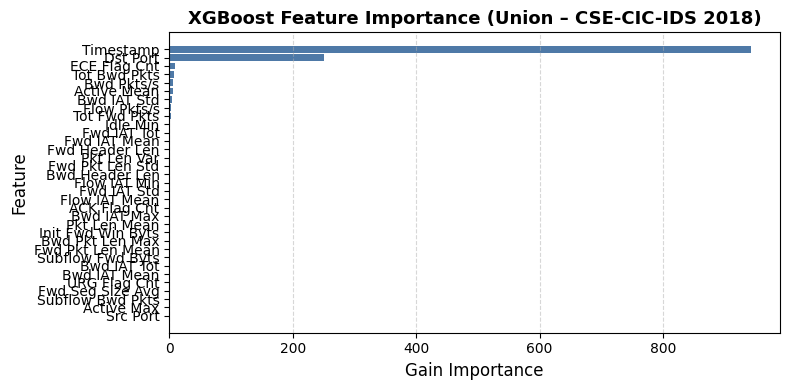

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
booster = xgb_union_model.get_booster()
# All trained features
all_features = list(xgb_union_model.feature_names_in_)

# Importance dictionary from booster
importance_dict = booster.get_score(importance_type="gain")

# Create full dataframe (missing features get gain = 0)
importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
}).sort_values(by="Gain", ascending=True)

print(importance_df)

# Plot
plt.figure(figsize=(8, 4))
plt.barh(importance_df["Feature"], importance_df["Gain"], color="#4e79a7")

plt.xlabel("Gain Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title(
    "XGBoost Feature Importance (Union – CSE-CIC-IDS 2018)",
    fontsize=13,
    fontweight="bold"
)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig(
    "ids2018_hybrid_union_feature_importance_all7.pdf",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


            Feature        Gain   Gain (%)
5   Fwd Pkt Len Std    1.058679   0.085337
21      Pkt Len Var    1.135685   0.091545
17   Fwd Header Len    1.171502   0.094432
11     Fwd IAT Mean    1.172400   0.094504
10      Fwd IAT Tot    1.602906   0.129206
31         Idle Min    1.754079   0.141392
2      Tot Fwd Pkts    2.058128   0.165900
7       Flow Pkts/s    2.244893   0.180955
15      Bwd IAT Std    4.360154   0.351460
29      Active Mean    6.543476   0.527452
19       Bwd Pkts/s    6.619365   0.533569
3      Tot Bwd Pkts    8.181293   0.659472
24     ECE Flag Cnt    9.932288   0.800615
0          Dst Port  250.378540  20.182351
1         Timestamp  942.368225  75.961808


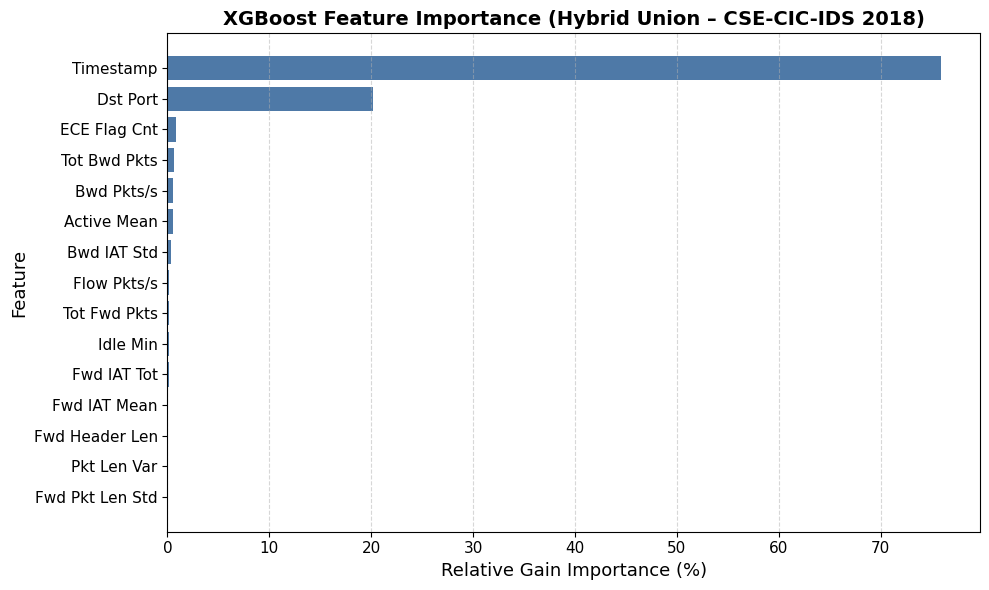

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# Get importance from trained UNION model
# -------------------------------------------------
booster = xgb_union_model.get_booster()

all_features = list(xgb_union_model.feature_names_in_)
importance_dict = booster.get_score(importance_type="gain")

importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
})

# -------------------------------------------------
# Sort and keep only TOP-K features
# -------------------------------------------------
TOP_K = 15   # <-- change to 10 or 15 if needed

importance_df = (
    importance_df
    .sort_values(by="Gain", ascending=False)
    .head(TOP_K)
    .sort_values(by="Gain", ascending=True)
)

# Optional: normalize gain (percentage)
importance_df["Gain (%)"] = (
    importance_df["Gain"] / importance_df["Gain"].sum()
) * 100

print(importance_df)

# -------------------------------------------------
# Plot (CLEAN & PAPER-READY)
# -------------------------------------------------
plt.figure(figsize=(10, 6))   # Bigger figure

plt.barh(
    importance_df["Feature"],
    importance_df["Gain (%)"],
    color="#4e79a7"
)

plt.xlabel("Relative Gain Importance (%)", fontsize=13)
plt.ylabel("Feature", fontsize=13)

plt.title(
    "XGBoost Feature Importance (Hybrid Union – CSE-CIC-IDS 2018)",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

# Save high-quality figure
plt.savefig(
    "ids2018_hybrid_union_feature_importance_top15.pdf",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


            Feature        Gain   Gain (%)
5   Fwd Pkt Len Std    1.058679   0.085337
21      Pkt Len Var    1.135685   0.091545
17   Fwd Header Len    1.171502   0.094432
11     Fwd IAT Mean    1.172400   0.094504
10      Fwd IAT Tot    1.602906   0.129206
31         Idle Min    1.754079   0.141392
2      Tot Fwd Pkts    2.058128   0.165900
7       Flow Pkts/s    2.244893   0.180955
15      Bwd IAT Std    4.360154   0.351460
29      Active Mean    6.543476   0.527452
19       Bwd Pkts/s    6.619365   0.533569
3      Tot Bwd Pkts    8.181293   0.659472
24     ECE Flag Cnt    9.932288   0.800615
0          Dst Port  250.378540  20.182351
1         Timestamp  942.368225  75.961808


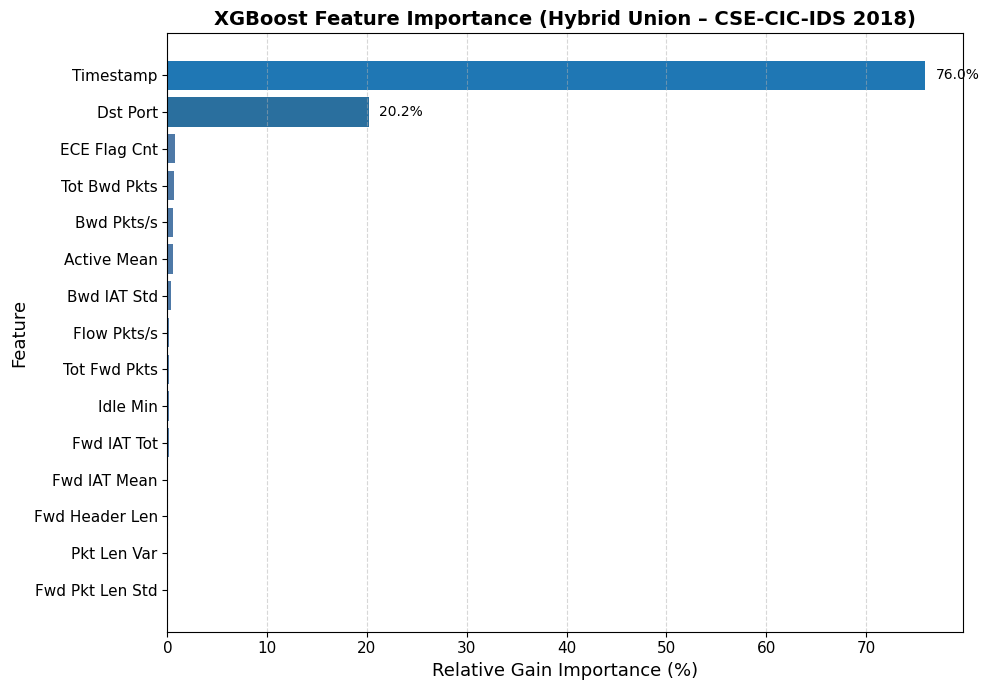

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. Get booster and feature importance
# -------------------------------------------------
booster = xgb_union_model.get_booster()

# All features used during training
all_features = list(xgb_union_model.feature_names_in_)

# Gain-based importance from XGBoost
importance_dict = booster.get_score(importance_type="gain")

# Build full dataframe (missing features get zero gain)
importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
})

# -------------------------------------------------
# 2. Keep TOP-K features (recommended for Union)
# -------------------------------------------------
TOP_K = 15

importance_df = (
    importance_df
    .sort_values(by="Gain", ascending=False)
    .head(TOP_K)
    .sort_values(by="Gain", ascending=True)
)

# Normalize gain to percentage (better readability)
importance_df["Gain (%)"] = (
    importance_df["Gain"] / importance_df["Gain"].sum()
) * 100

print(importance_df)

# -------------------------------------------------
# 3. Plot (paper-ready & clean)
# -------------------------------------------------
plt.figure(figsize=(10, 7))  # Increased height for readability

# Color styling (highlight top 2 features)
colors = ["#4e79a7"] * len(importance_df)
colors[-1] = "#1f77b4"   # Timestamp
colors[-2] = "#2a6f9e"   # Dst Port

plt.barh(
    importance_df["Feature"],
    importance_df["Gain (%)"],
    color=colors
)

plt.xlabel("Relative Gain Importance (%)", fontsize=13)
plt.ylabel("Feature", fontsize=13)

plt.title(
    "XGBoost Feature Importance (Hybrid Union – CSE-CIC-IDS 2018)",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Add value labels ONLY for top-2 features
for _, row in importance_df.tail(2).iterrows():
    plt.text(
        row["Gain (%)"] + 1,
        row["Feature"],
        f"{row['Gain (%)']:.1f}%",
        va="center",
        fontsize=10
    )

plt.tight_layout()

# -------------------------------------------------
# 4. Save high-quality figure for paper
# -------------------------------------------------
plt.savefig(
    "ids2018_hybrid_union_feature_importance_top15.pdf",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


intersection

            Feature        Gain   Gain (%)
6            Dst IP    0.000000   0.000000
4  Subflow Fwd Byts    0.457208   0.049523
2       Fwd IAT Tot    1.817574   0.196871
5  Fwd Seg Size Min    4.354860   0.471698
3      RST Flag Cnt    7.494692   0.811790
0          Dst Port  154.707794  16.757220
1         Timestamp  754.398560  81.712899


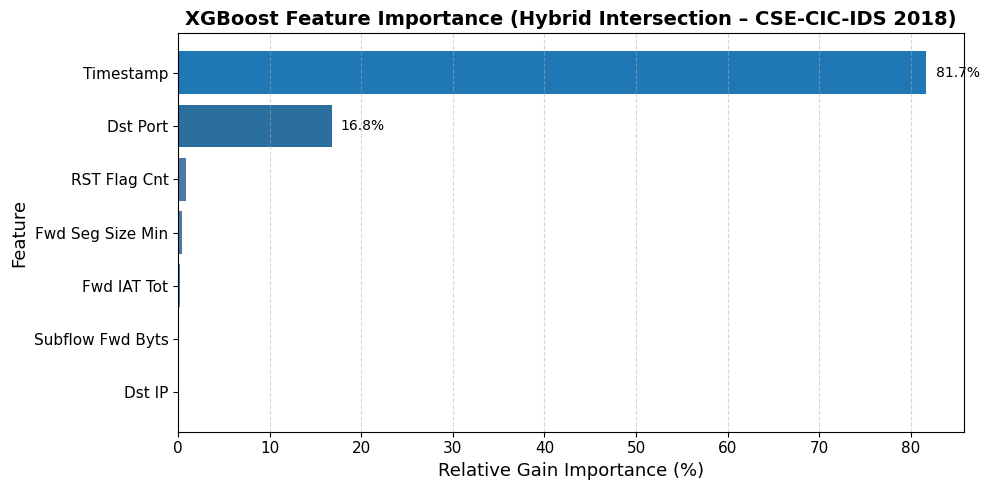

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. Get booster and importance
# -------------------------------------------------
booster = xgb_model.get_booster()

# All trained features (7 features)
all_features = list(xgb_model.feature_names_in_)

# Gain-based importance
importance_dict = booster.get_score(importance_type="gain")

# Build dataframe (include zero-gain features)
importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
})

# Sort for plotting
importance_df = importance_df.sort_values(by="Gain", ascending=True)

# Normalize gain to percentage
importance_df["Gain (%)"] = (
    importance_df["Gain"] / importance_df["Gain"].sum()
) * 100

print(importance_df)

# -------------------------------------------------
# 2. Plot (clean & journal-ready)
# -------------------------------------------------
plt.figure(figsize=(10, 5))  # slightly wider for readability

# Color styling: highlight top-2 features
colors = ["#4e79a7"] * len(importance_df)
colors[-1] = "#1f77b4"   # Timestamp (highest)
colors[-2] = "#2a6f9e"   # Dst Port (second highest)

plt.barh(
    importance_df["Feature"],
    importance_df["Gain (%)"],
    color=colors
)

plt.xlabel("Relative Gain Importance (%)", fontsize=13)
plt.ylabel("Feature", fontsize=13)

plt.title(
    "XGBoost Feature Importance (Hybrid Intersection – CSE-CIC-IDS 2018)",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Grid
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Add value labels for top-2 features only
for _, row in importance_df.tail(2).iterrows():
    plt.text(
        row["Gain (%)"] + 1,
        row["Feature"],
        f"{row['Gain (%)']:.1f}%",
        va="center",
        fontsize=10
    )

plt.tight_layout()

# -------------------------------------------------
# 3. Save high-quality figure
# -------------------------------------------------
plt.savefig(
    "ids2018_hybrid_intersection_feature_importance.pdf",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


voting

In [13]:
import pickle

model_path = "/kaggle/input/voting-model-ids/other/default/1/hybrid_hlo_models_voting_model (2).pkl"
with open(model_path, "rb") as f:
    xgb_voting_model = pickle.load(f)


Hybrid Voting model loaded successfully
             Feature        Gain   Gain (%)
4    Fwd Pkt Len Min    0.639653   0.054850
7    Bwd Pkt Len Max    0.657824   0.056408
10    Fwd Header Len    0.737299   0.063223
8       Flow IAT Min    0.912202   0.078220
19          Idle Max    0.979082   0.083955
6    Fwd Pkt Len Std    1.120708   0.096100
9       Fwd IAT Mean    1.281263   0.109867
3       Tot Bwd Pkts    1.661547   0.142476
12      RST Flag Cnt    2.660354   0.228123
17  Fwd Seg Size Min    4.662516   0.399806
2       Tot Fwd Pkts    5.137075   0.440499
15  Bwd Seg Size Avg    5.789061   0.496406
18       Active Mean   10.783224   0.924651
0           Dst Port  236.040115  20.240206
1          Timestamp  893.132324  76.585211


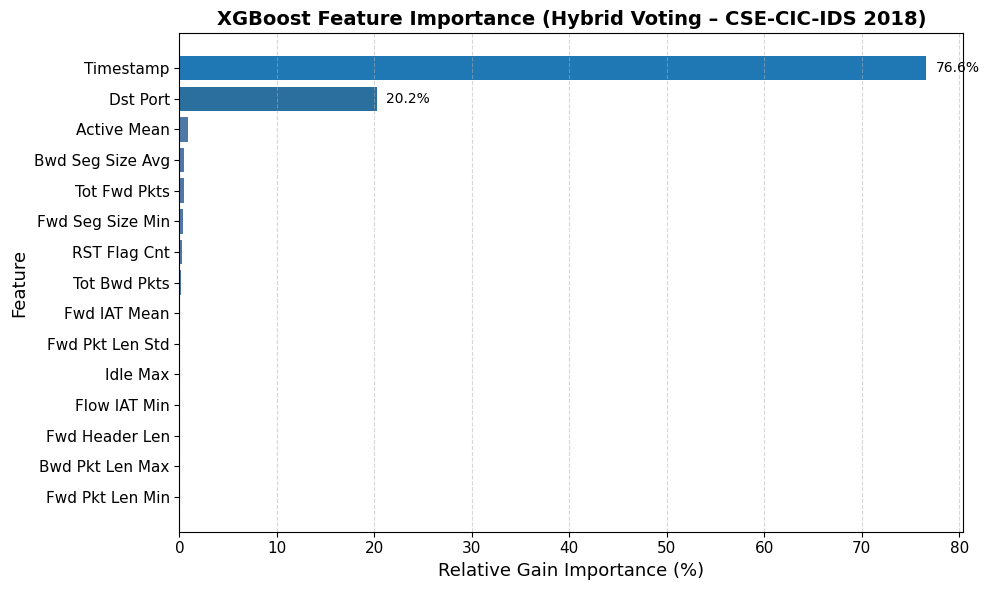

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# -------------------------------------------------
# 1. Load the trained Hybrid Voting model
# -------------------------------------------------
model_path = "/kaggle/input/voting-model-ids/other/default/1/hybrid_hlo_models_voting_model (2).pkl"

with open(model_path, "rb") as f:
    xgb_voting_model = pickle.load(f)

print("Hybrid Voting model loaded successfully")

# -------------------------------------------------
# 2. Extract feature importance (GAIN)
# -------------------------------------------------
booster = xgb_voting_model.get_booster()

# All features used during training
all_features = list(xgb_voting_model.feature_names_in_)

# Gain-based importance
importance_dict = booster.get_score(importance_type="gain")

# Build dataframe (include zero-gain features)
importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
})

# -------------------------------------------------
# 3. Keep TOP-K features (recommended for Voting)
# -------------------------------------------------
TOP_K = 15   # Voting has ~21 features → Top-10 or Top-15 is ideal

importance_df = (
    importance_df
    .sort_values(by="Gain", ascending=False)
    .head(TOP_K)
    .sort_values(by="Gain", ascending=True)
)

# Normalize gain to percentage
importance_df["Gain (%)"] = (
    importance_df["Gain"] / importance_df["Gain"].sum()
) * 100

print(importance_df)

# -------------------------------------------------
# 4. Plot (clean & journal-ready)
# -------------------------------------------------
plt.figure(figsize=(10, 6))

# Color styling (highlight top-2 features)
colors = ["#4e79a7"] * len(importance_df)
colors[-1] = "#1f77b4"   # Most important feature
colors[-2] = "#2a6f9e"   # Second most important feature

plt.barh(
    importance_df["Feature"],
    importance_df["Gain (%)"],
    color=colors
)

plt.xlabel("Relative Gain Importance (%)", fontsize=13)
plt.ylabel("Feature", fontsize=13)

plt.title(
    "XGBoost Feature Importance (Hybrid Voting – CSE-CIC-IDS 2018)",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.5)

# Add value labels for top-2 features only
for _, row in importance_df.tail(2).iterrows():
    plt.text(
        row["Gain (%)"] + 1,
        row["Feature"],
        f"{row['Gain (%)']:.1f}%",
        va="center",
        fontsize=10
    )

plt.tight_layout()

# -------------------------------------------------
# 5. Save high-quality figure
# -------------------------------------------------
plt.savefig(
    "ids2018_hybrid_voting_feature_importance_top15.pdf",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


Hybrid Voting model loaded successfully
             Feature        Gain   Gain (%)
4    Fwd Pkt Len Min    0.639653   0.054850
7    Bwd Pkt Len Max    0.657824   0.056408
10    Fwd Header Len    0.737299   0.063223
8       Flow IAT Min    0.912202   0.078220
19          Idle Max    0.979082   0.083955
6    Fwd Pkt Len Std    1.120708   0.096100
9       Fwd IAT Mean    1.281263   0.109867
3       Tot Bwd Pkts    1.661547   0.142476
12      RST Flag Cnt    2.660354   0.228123
17  Fwd Seg Size Min    4.662516   0.399806
2       Tot Fwd Pkts    5.137075   0.440499
15  Bwd Seg Size Avg    5.789061   0.496406
18       Active Mean   10.783224   0.924651
0           Dst Port  236.040115  20.240206
1          Timestamp  893.132324  76.585211


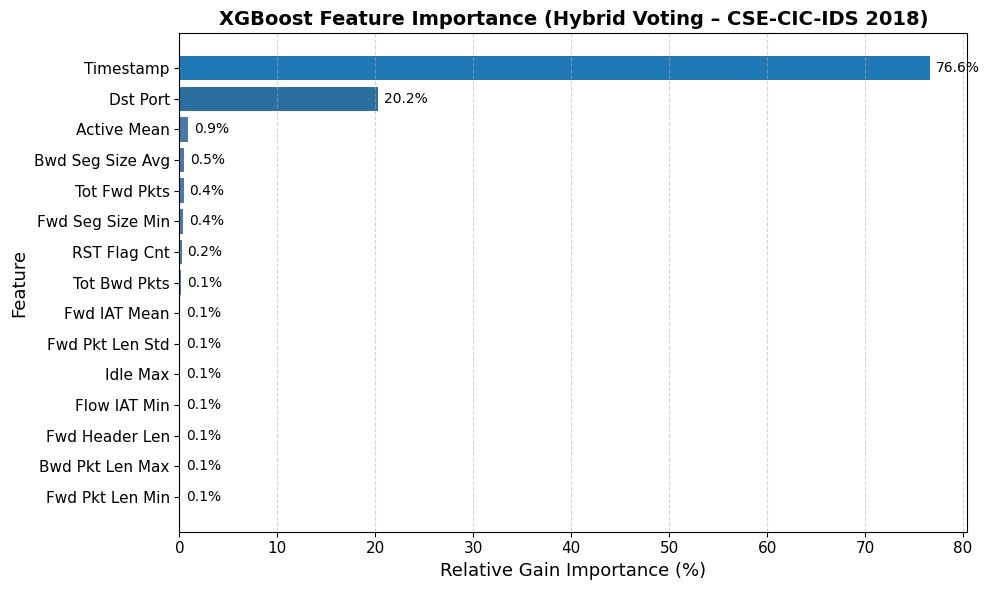

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# -------------------------------------------------
# 1. Load the trained Hybrid Voting model
# -------------------------------------------------
model_path = "/kaggle/input/voting-model-ids/other/default/1/hybrid_hlo_models_voting_model (2).pkl"

with open(model_path, "rb") as f:
    xgb_voting_model = pickle.load(f)

print("Hybrid Voting model loaded successfully")

# -------------------------------------------------
# 2. Extract feature importance (GAIN)
# -------------------------------------------------
booster = xgb_voting_model.get_booster()

all_features = list(xgb_voting_model.feature_names_in_)

importance_dict = booster.get_score(importance_type="gain")

importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
})

# -------------------------------------------------
# 3. Keep TOP-K features (Voting → Top-15)
# -------------------------------------------------
TOP_K = 15

importance_df = (
    importance_df
    .sort_values(by="Gain", ascending=False)
    .head(TOP_K)
    .sort_values(by="Gain", ascending=True)
)

# Normalize gain to percentage
importance_df["Gain (%)"] = (
    importance_df["Gain"] / importance_df["Gain"].sum()
) * 100

print(importance_df)

# -------------------------------------------------
# 4. Plot (paper-ready)
# -------------------------------------------------
plt.figure(figsize=(10, 6))

# Highlight top-2 features
colors = ["#4e79a7"] * len(importance_df)
colors[-1] = "#1f77b4"   # most important
colors[-2] = "#2a6f9e"   # second most important

plt.barh(
    importance_df["Feature"],
    importance_df["Gain (%)"],
    color=colors
)

plt.xlabel("Relative Gain Importance (%)", fontsize=13)
plt.ylabel("Feature", fontsize=13)

plt.title(
    "XGBoost Feature Importance (Hybrid Voting – CSE-CIC-IDS 2018)",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# -------------------------------------------------
# ADD PERCENTAGE LABELS FOR ALL FEATURES
# -------------------------------------------------
for _, row in importance_df.iterrows():
    plt.text(
        row["Gain (%)"] + 0.6,
        row["Feature"],
        f"{row['Gain (%)']:.1f}%",
        va="center",
        fontsize=10
    )

plt.tight_layout()

# -------------------------------------------------
# 5. Save high-quality figure
# -------------------------------------------------
plt.savefig(
    "ids2018_hybrid_voting_feature_importance_top15_labeled.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [15]:
import pandas as pd

df = pd.read_csv("/kaggle/input/2018ids/ids2018_cleaned_combined_1.csv")  # change path if needed

TARGET = "Label"   # Benign = 0, Attack = 1

X = df.drop(TARGET, axis=1)
y = df[TARGET].astype(int)

print("Original dimension:", X.shape[1])


Original dimension: 75


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = xgb_model.predict(X_test)

print("\n===== XGBoost Results (IDS 2018) =====")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.8f}")
print(f"Precision : {precision_score(y_test, y_pred):.8f}")
print(f"Recall    : {recall_score(y_test, y_pred):.8f}")
print(f"F1 Score  : {f1_score(y_test, y_pred):.8f}")



===== XGBoost Results (IDS 2018) =====
Accuracy  : 0.99928429
Precision : 0.99968600
Recall    : 0.99884961
F1 Score  : 0.99926763


              Feature        Gain   Gain (%)
32      Fwd PSH Flags   24.833439   0.962604
36         Fwd Pkts/s   33.132515   1.284296
8     Fwd Pkt Len Max   33.585316   1.301848
25        Fwd IAT Max   46.793888   1.813844
59  Init Fwd Win Byts   47.703892   1.849118
71            Flow ID   66.999588   2.597065
63        Active Mean   68.105812   2.639945
54   Bwd Seg Size Avg   73.665291   2.855444
14   Bwd Pkt Len Mean   97.158997   3.766117
62   Fwd Seg Size Min  113.666016   4.405969
48       URG Flag Cnt  138.493652   5.368348
0            Dst Port  230.842789   8.948023
72             Src IP  296.424072  11.490111
11    Fwd Pkt Len Std  431.742676  16.735387
2           Timestamp  876.671021  33.981881


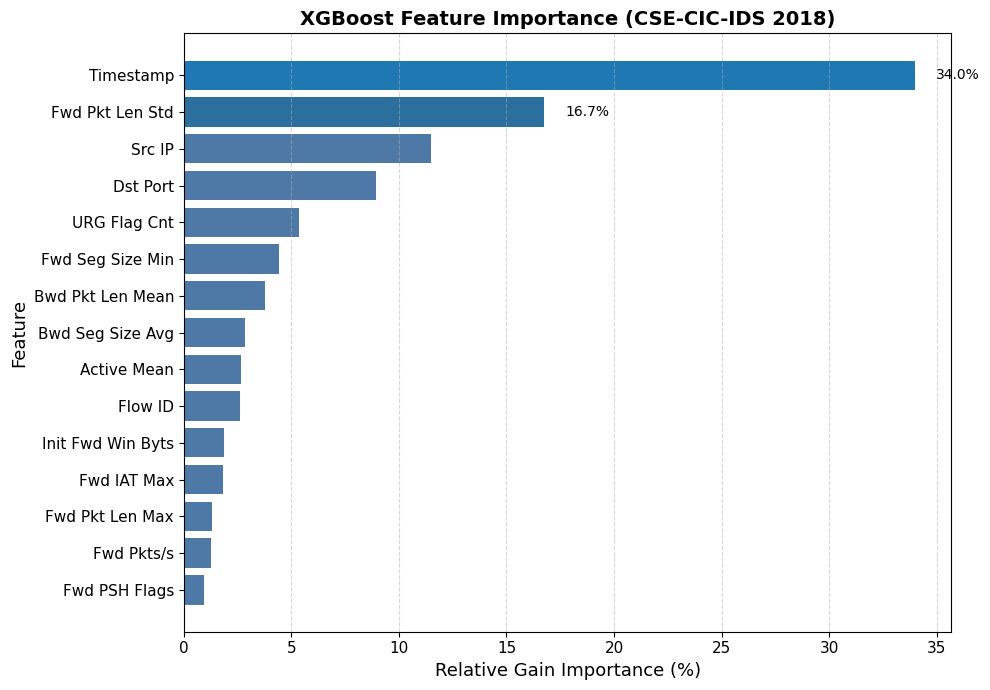

In [18]:
import matplotlib.pyplot as plt

# -------------------------------------------------
# Extract importance from trained IDS model
# -------------------------------------------------
booster = xgb_model.get_booster()

all_features = list(X.columns)

importance_dict = booster.get_score(importance_type="gain")

importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
})
TOP_K = 15

importance_df = (
    importance_df
    .sort_values(by="Gain", ascending=False)
    .head(TOP_K)
    .sort_values(by="Gain", ascending=True)
)

# Normalize to percentage
importance_df["Gain (%)"] = (
    importance_df["Gain"] / importance_df["Gain"].sum()
) * 100

print(importance_df)
plt.figure(figsize=(10, 7))

# Highlight top-2 features
colors = ["#4e79a7"] * len(importance_df)
colors[-1] = "#1f77b4"   # most important
colors[-2] = "#2a6f9e"   # second most important

plt.barh(
    importance_df["Feature"],
    importance_df["Gain (%)"],
    color=colors
)

plt.xlabel("Relative Gain Importance (%)", fontsize=13)
plt.ylabel("Feature", fontsize=13)

plt.title(
    "XGBoost Feature Importance (CSE-CIC-IDS 2018)",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Label only top-2
for _, row in importance_df.tail(2).iterrows():
    plt.text(
        row["Gain (%)"] + 1,
        row["Feature"],
        f"{row['Gain (%)']:.1f}%",
        va="center",
        fontsize=10
    )

plt.tight_layout()

plt.savefig(
    "ids2018_xgboost_feature_importance_top15.pdf",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


              Feature        Gain   Gain (%)
32      Fwd PSH Flags   24.833439   0.962604
36         Fwd Pkts/s   33.132515   1.284296
8     Fwd Pkt Len Max   33.585316   1.301848
25        Fwd IAT Max   46.793888   1.813844
59  Init Fwd Win Byts   47.703892   1.849118
71            Flow ID   66.999588   2.597065
63        Active Mean   68.105812   2.639945
54   Bwd Seg Size Avg   73.665291   2.855444
14   Bwd Pkt Len Mean   97.158997   3.766117
62   Fwd Seg Size Min  113.666016   4.405969
48       URG Flag Cnt  138.493652   5.368348
0            Dst Port  230.842789   8.948023
72             Src IP  296.424072  11.490111
11    Fwd Pkt Len Std  431.742676  16.735387
2           Timestamp  876.671021  33.981881


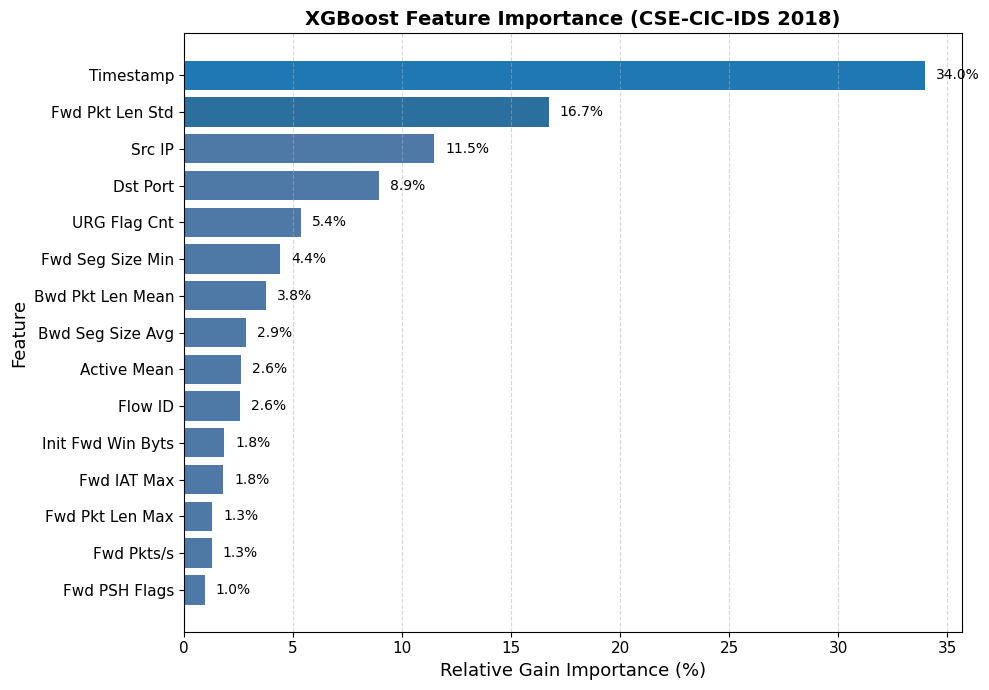

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------
# Extract importance from trained IDS model
# -------------------------------------------------
booster = xgb_model.get_booster()
all_features = list(X.columns)

importance_dict = booster.get_score(importance_type="gain")

importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
})

TOP_K = 15

importance_df = (
    importance_df
    .sort_values(by="Gain", ascending=False)
    .head(TOP_K)
    .sort_values(by="Gain", ascending=True)
)

# Normalize to percentage
importance_df["Gain (%)"] = (
    importance_df["Gain"] / importance_df["Gain"].sum()
) * 100

print(importance_df)

# -------------------------------------------------
# Plot
# -------------------------------------------------
plt.figure(figsize=(10, 7))

# Highlight top-2 features
colors = ["#4e79a7"] * len(importance_df)
colors[-1] = "#1f77b4"   # most important
colors[-2] = "#2a6f9e"   # second most important

plt.barh(
    importance_df["Feature"],
    importance_df["Gain (%)"],
    color=colors
)

plt.xlabel("Relative Gain Importance (%)", fontsize=13)
plt.ylabel("Feature", fontsize=13)

plt.title(
    "XGBoost Feature Importance (CSE-CIC-IDS 2018)",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# -------------------------------------------------
# ADD LABELS FOR ALL FEATURES
# -------------------------------------------------
for _, row in importance_df.iterrows():
    plt.text(
        row["Gain (%)"] + 0.5,   # slight offset
        row["Feature"],
        f"{row['Gain (%)']:.1f}%",
        va="center",
        fontsize=10
    )

plt.tight_layout()

# -------------------------------------------------
# Save figure
# -------------------------------------------------
plt.savefig(
    "ids2018_xgboost_feature_importance_top15_labeled_done.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


union final

Hybrid Union model loaded successfully
            Feature        Gain   Gain (%)
5   Fwd Pkt Len Std    1.058679   0.085337
21      Pkt Len Var    1.135685   0.091545
17   Fwd Header Len    1.171502   0.094432
11     Fwd IAT Mean    1.172400   0.094504
10      Fwd IAT Tot    1.602906   0.129206
31         Idle Min    1.754079   0.141392
2      Tot Fwd Pkts    2.058128   0.165900
7       Flow Pkts/s    2.244893   0.180955
15      Bwd IAT Std    4.360154   0.351460
29      Active Mean    6.543476   0.527452
19       Bwd Pkts/s    6.619365   0.533569
3      Tot Bwd Pkts    8.181293   0.659472
24     ECE Flag Cnt    9.932288   0.800615
0          Dst Port  250.378540  20.182351
1         Timestamp  942.368225  75.961808


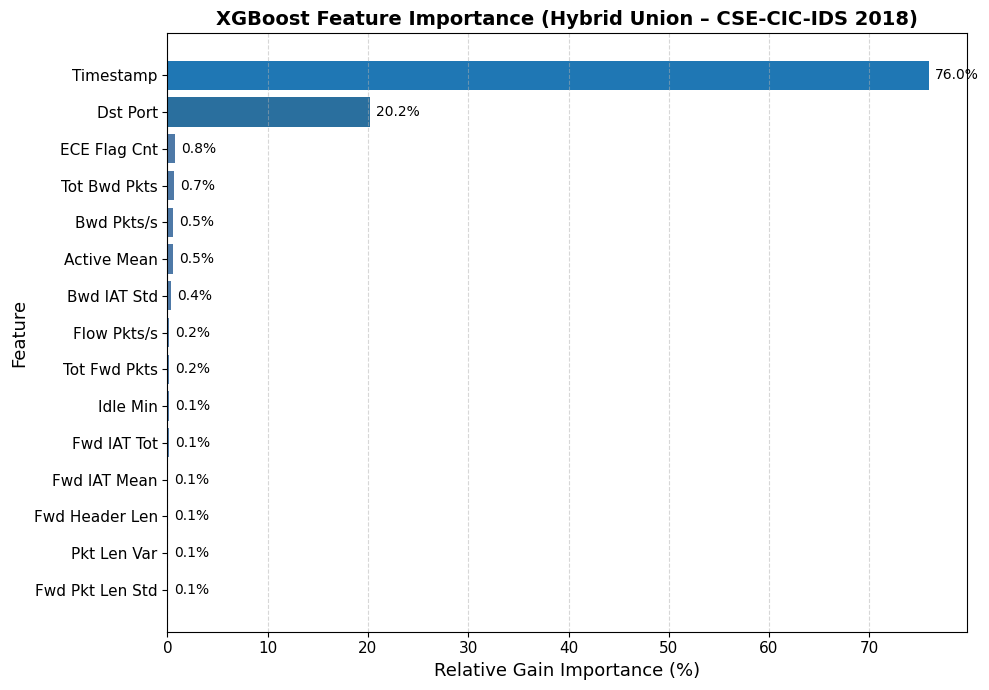

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# -------------------------------------------------
# 1. Load the trained Hybrid Union model
# -------------------------------------------------
model_path = "/kaggle/input/union-model-ids/other/default/1/hybrid_hlo_models_union_model (2).pkl"

with open(model_path, "rb") as f:
    xgb_union_model = pickle.load(f)

print("Hybrid Union model loaded successfully")

# -------------------------------------------------
# 2. Extract feature importance (GAIN)
# -------------------------------------------------
booster = xgb_union_model.get_booster()

all_features = list(xgb_union_model.feature_names_in_)

importance_dict = booster.get_score(importance_type="gain")

importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
})

# -------------------------------------------------
# 3. Keep TOP-K features (Union → Top-15)
# -------------------------------------------------
TOP_K = 15

importance_df = (
    importance_df
    .sort_values(by="Gain", ascending=False)
    .head(TOP_K)
    .sort_values(by="Gain", ascending=True)
)

# Normalize gain to percentage
importance_df["Gain (%)"] = (
    importance_df["Gain"] / importance_df["Gain"].sum()
) * 100

print(importance_df)

# -------------------------------------------------
# 4. Plot (paper-ready)
# -------------------------------------------------
plt.figure(figsize=(10, 7))

# Highlight top-2 features
colors = ["#4e79a7"] * len(importance_df)
colors[-1] = "#1f77b4"   # most important
colors[-2] = "#2a6f9e"   # second most important

plt.barh(
    importance_df["Feature"],
    importance_df["Gain (%)"],
    color=colors
)

plt.xlabel("Relative Gain Importance (%)", fontsize=13)
plt.ylabel("Feature", fontsize=13)

plt.title(
    "XGBoost Feature Importance (Hybrid Union – CSE-CIC-IDS 2018)",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# -------------------------------------------------
# ADD PERCENTAGE LABELS FOR ALL FEATURES
# -------------------------------------------------
for _, row in importance_df.iterrows():
    plt.text(
        row["Gain (%)"] + 0.6,
        row["Feature"],
        f"{row['Gain (%)']:.1f}%",
        va="center",
        fontsize=10
    )

plt.tight_layout()

# -------------------------------------------------
# 5. Save high-quality figure
# -------------------------------------------------
plt.savefig(
    "ids2018_hybrid_union_feature_importance_top15_labeled.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


intersection done

Hybrid Intersection model loaded successfully
            Feature        Gain   Gain (%)
6            Dst IP    0.000000   0.000000
4  Subflow Fwd Byts    0.457208   0.049523
2       Fwd IAT Tot    1.817574   0.196871
5  Fwd Seg Size Min    4.354860   0.471698
3      RST Flag Cnt    7.494692   0.811790
0          Dst Port  154.707794  16.757220
1         Timestamp  754.398560  81.712899


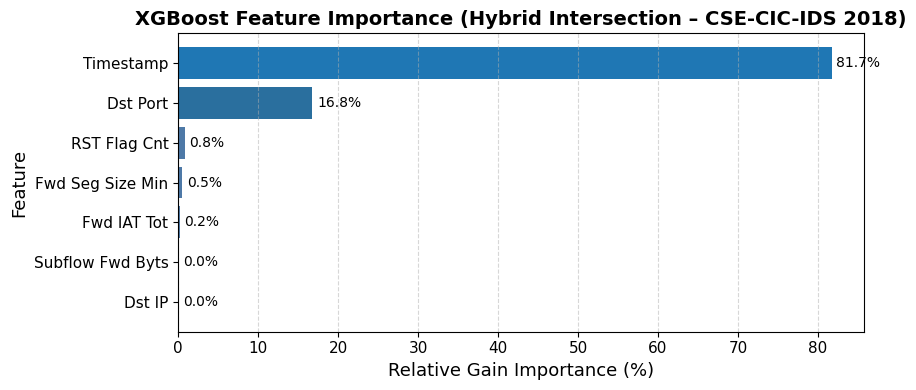

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# -------------------------------------------------
# 1. Load the trained Hybrid Intersection model
# -------------------------------------------------
model_path = "/kaggle/input/intersection-model/other/default/1/hybrid_hlo_models_intersection_model (2).pkl"

with open(model_path, "rb") as f:
    xgb_intersection_model = pickle.load(f)

print("Hybrid Intersection model loaded successfully")

# -------------------------------------------------
# 2. Extract feature importance (GAIN)
# -------------------------------------------------
booster = xgb_intersection_model.get_booster()

# All features used during training (7 features)
all_features = list(xgb_intersection_model.feature_names_in_)

importance_dict = booster.get_score(importance_type="gain")

importance_df = pd.DataFrame({
    "Feature": all_features,
    "Gain": [importance_dict.get(f, 0.0) for f in all_features]
})

# Sort for plotting
importance_df = importance_df.sort_values(by="Gain", ascending=True)

# Normalize gain to percentage
importance_df["Gain (%)"] = (
    importance_df["Gain"] / importance_df["Gain"].sum()
) * 100

print(importance_df)

# -------------------------------------------------
# 3. Plot (paper-ready)
# -------------------------------------------------
plt.figure(figsize=(9, 4))  # Compact height (7 features only)

# Highlight top-2 features
colors = ["#4e79a7"] * len(importance_df)
colors[-1] = "#1f77b4"   # most important
colors[-2] = "#2a6f9e"   # second most important

plt.barh(
    importance_df["Feature"],
    importance_df["Gain (%)"],
    color=colors
)

plt.xlabel("Relative Gain Importance (%)", fontsize=13)
plt.ylabel("Feature", fontsize=13)

plt.title(
    "XGBoost Feature Importance (Hybrid Intersection – CSE-CIC-IDS 2018)",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# -------------------------------------------------
# ADD PERCENTAGE LABELS FOR ALL FEATURES
# -------------------------------------------------
for _, row in importance_df.iterrows():
    plt.text(
        row["Gain (%)"] + 0.6,
        row["Feature"],
        f"{row['Gain (%)']:.1f}%",
        va="center",
        fontsize=10
    )

plt.tight_layout()

# -------------------------------------------------
# 4. Save high-quality figure
# -------------------------------------------------
plt.savefig(
    "ids2018_hybrid_intersection_feature_importance_labeled.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
